<a href="https://colab.research.google.com/github/nguyendinhquocx/colab/blob/master/hmsg_google_colab_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
  # --- [1. Cài đặt & Kết nối Google Drive và Google Sheets] ---
# Chạy cell này trước tiên để setup môi trường, hỗ trợ tiếng Việt.

# Cài đặt thư viện cần thiết
!pip install --quiet --upgrade gspread gspread-dataframe matplotlib seaborn plotly

# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gspread
from google.colab import auth, drive
from google.auth import default
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive để lưu file
print("📁 Kết nối Google Drive...")
drive.mount('/content/drive')

# Xác thực Google để truy cập Sheets
print("🔐 Xác thực Google Sheets...")
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Cài đặt font tiếng Việt cho matplotlib
!apt-get install -y fonts-dejavu-core
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Hoàn tất cài đặt môi trường!")

📁 Kết nối Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔐 Xác thực Google Sheets...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu-core is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
✅ Hoàn tất cài đặt môi trường!


In [49]:
# --- [2. Kết nối và đọc dữ liệu từ Google Sheets] ---

# Khai báo thông tin Google Sheet
SHEET_URL = 'https://docs.google.com/spreadsheets/d/15eMfEvqNvy1qBNG1NXwr7eSBsYZA6KqlBB3lTyzTfhM/edit?gid=2035877512'
SHEET_NAME = 'chi tieu'
IMG_DIR = '/content/drive/MyDrive/Colab Notebooks/hmsg google colab total'

# Tạo thư mục lưu ảnh nếu chưa có
os.makedirs(IMG_DIR, exist_ok=True)
print(f"📂 Thư mục lưu ảnh: {IMG_DIR}")

# Kết nối và đọc dữ liệu
print("📊 Đang tải dữ liệu từ Google Sheets...")
try:
    sh = gc.open_by_url(SHEET_URL)
    worksheet = sh.worksheet(SHEET_NAME)
    data = worksheet.get_all_records()
    df_raw = pd.DataFrame(data)
    print(f"✅ Đã tải {len(df_raw)} dòng dữ liệu từ sheet '{SHEET_NAME}'")

    # Hiển thị thông tin cơ bản về dữ liệu
    print(f"\n📋 Thông tin dữ liệu:")
    print(f"- Số dòng: {len(df_raw)}")
    print(f"- Số cột: {len(df_raw.columns)}")
    print(f"- Các cột: {list(df_raw.columns)}")

except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {e}")

📂 Thư mục lưu ảnh: /content/drive/MyDrive/Colab Notebooks/hmsg google colab total
📊 Đang tải dữ liệu từ Google Sheets...
✅ Đã tải 159 dòng dữ liệu từ sheet 'chi tieu'

📋 Thông tin dữ liệu:
- Số dòng: 159
- Số cột: 12
- Các cột: ['team', 'ma nhan vien', 'ten nhan vien', 'thang', 'chi tieu', 'thuc hien', 'doanh thu 2024', 'doanh thu 2023', 'thuc hien tam tinh', 'date', 'nam', 'phong']


In [50]:
# --- [3. Hiển thị mẫu dữ liệu gốc] ---

print("🔍 Mẫu dữ liệu gốc (5 dòng đầu):")
display(df_raw.head())

print("\n📊 Thông tin kiểu dữ liệu:")
print(df_raw.dtypes)

print("\n📈 Thống kê mô tả:")
print(df_raw.describe(include='all'))

🔍 Mẫu dữ liệu gốc (5 dòng đầu):


,team,ma nhan vien,ten nhan vien,thang,chi tieu,thuc hien,doanh thu 2024,doanh thu 2023,thuc hien tam tinh,date,nam,phong
0,CHC,440,Trần Thị Khanh,1,300000000,314180000,94960000,170677000,314180000,1/1/2025,2025,P.KD HMSG
1,CHC,440,Trần Thị Khanh,2,150000000,323134300,135567000,220371325,323134300,2/1/2025,2025,P.KD HMSG
2,CHC,440,Trần Thị Khanh,3,240000000,360553100,217531500,325923200,360553100,3/1/2025,2025,P.KD HMSG
3,CHC,440,Trần Thị Khanh,4,650000000,300685250,586704350,206020000,300685250,4/1/2025,2025,P.KD HMSG
4,CHC,440,Trần Thị Khanh,5,470000000,528742200,425507700,1062136800,528742200,5/1/2025,2025,P.KD HMSG



📊 Thông tin kiểu dữ liệu:
team                  object
ma nhan vien           int64
ten nhan vien         object
thang                  int64
chi tieu              object
thuc hien             object
doanh thu 2024        object
doanh thu 2023        object
thuc hien tam tinh    object
date                  object
nam                    int64
phong                 object
dtype: object

📈 Thống kê mô tả:
            team  ma nhan vien   ten nhan vien       thang      chi tieu  \
count        159    159.000000             159  159.000000  1.590000e+02   
unique         5           NaN              14         NaN  9.700000e+01   
top     Referral           NaN  Trần Thị Khanh         NaN  3.400000e+09   
freq          54           NaN              12         NaN  6.000000e+00   
mean         NaN   3529.018868             NaN    6.754717           NaN   
std          NaN   4490.235192             NaN    3.378482           NaN   
min          NaN      1.000000             NaN    1.000000  

In [51]:
# --- [4. Làm sạch & Chuẩn hóa dữ liệu] ---

# Copy để không ảnh hưởng dữ liệu gốc
df = df_raw.copy()

print("🧹 Đang làm sạch và chuẩn hóa dữ liệu...")

# Hàm để clean số (loại bỏ dấu phay, khoảng trắng)
def clean_numeric(value):
    if pd.isna(value) or value == '' or value == '-':
        return np.nan
    return str(value).replace(',', '').replace(' ', '').replace('-', '')

# Danh sách các cột cần chuyển về số
numeric_cols = ['chi tieu', 'thuc hien', 'doanh thu 2024', 'doanh thu 2023', 'thuc hien tam tinh']

# Làm sạch và chuyển đổi các cột số
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_numeric)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Chuyển đổi cột thời gian
df['thang'] = pd.to_numeric(df['thang'], errors='coerce')
df['nam'] = pd.to_numeric(df['nam'], errors='coerce')

# Tạo các trường tính toán
print("➕ Tạo các trường tính toán...")

# 1. Tỷ lệ hoàn thành chỉ tiêu (%)
df['ty_le_hoan_thanh'] = np.where(df['chi tieu'] > 0,
                                  (df['thuc hien'] / df['chi tieu']) * 100,
                                  np.nan)

# 2. Chênh lệch so với chỉ tiêu
df['chenh_lech_chi_tieu'] = df['thuc hien'] - df['chi tieu']

# 3. Tăng trưởng so với 2024
df['tang_truong_2024'] = np.where(df['doanh thu 2024'] > 0,
                                  ((df['thuc hien'] - df['doanh thu 2024']) / df['doanh thu 2024']) * 100,
                                  np.nan)

# 4. Tăng trưởng so với 2023
df['tang_truong_2023'] = np.where(df['doanh thu 2023'] > 0,
                                  ((df['thuc hien'] - df['doanh thu 2023']) / df['doanh thu 2023']) * 100,
                                  np.nan)

# 5. Trạng thái hoàn thành
df['trang_thai'] = np.where(df['ty_le_hoan_thanh'] >= 100, 'Đạt chỉ tiêu',
                   np.where(df['ty_le_hoan_thanh'] >= 80, 'Gần đạt',
                   np.where(df['ty_le_hoan_thanh'] >= 50, 'Chưa đạt', 'Thấp')))

print("✅ Hoàn tất làm sạch dữ liệu!")

🧹 Đang làm sạch và chuẩn hóa dữ liệu...
➕ Tạo các trường tính toán...
✅ Hoàn tất làm sạch dữ liệu!


In [52]:
# --- [5. Hiển thị mẫu dữ liệu sau khi xử lý] ---

print("🔍 Mẫu dữ liệu sau khi chuẩn hóa:")
cols_to_show = ['ten nhan vien', 'thang', 'chi tieu', 'thuc hien', 'ty_le_hoan_thanh',
                'chenh_lech_chi_tieu', 'tang_truong_2024', 'trang_thai']
display(df[cols_to_show].head(10))

print("\n📊 Thống kê các trường tính toán:")
calc_cols = ['ty_le_hoan_thanh', 'chenh_lech_chi_tieu', 'tang_truong_2024', 'tang_truong_2023']
display(df[calc_cols].describe())

print("\n📈 Phân bố trạng thái hoàn thành:")
print(df['trang_thai'].value_counts())

# Kiểm tra dữ liệu thiếu
print(f"\n⚠️ Dữ liệu thiếu trong các cột quan trọng:")
missing_data = df[['thuc hien', 'chi tieu', 'ty_le_hoan_thanh']].isnull().sum()
print(missing_data)

🔍 Mẫu dữ liệu sau khi chuẩn hóa:


,ten nhan vien,thang,chi tieu,thuc hien,ty_le_hoan_thanh,chenh_lech_chi_tieu,tang_truong_2024,trang_thai
0,Trần Thị Khanh,1,3.000000e+08,314180000.0,104.726667,14180000.0,230.855097,Đạt chỉ tiêu
1,Trần Thị Khanh,2,1.500000e+08,323134300.0,215.422867,173134300.0,138.357639,Đạt chỉ tiêu
2,Trần Thị Khanh,3,2.400000e+08,360553100.0,150.230458,120553100.0,65.747535,Đạt chỉ tiêu
3,Trần Thị Khanh,4,6.500000e+08,300685250.0,46.259269,-349314750.0,-48.750124,Thấp
4,Trần Thị Khanh,5,4.700000e+08,528742200.0,112.498340,58742200.0,24.261488,Đạt chỉ tiêu
5,Trần Thị Khanh,6,1.530000e+09,NaN,NaN,NaN,NaN,Thấp
6,Trần Thị Khanh,7,1.040000e+09,NaN,NaN,NaN,NaN,Thấp
7,Trần Thị Khanh,8,2.310000e+09,NaN,NaN,NaN,NaN,Thấp
8,Trần Thị Khanh,9,6.700000e+08,NaN,NaN,NaN,NaN,Thấp
9,Trần Thị Khanh,10,2.100000e+09,NaN,NaN,NaN,NaN,Thấp



📊 Thống kê các trường tính toán:


,ty_le_hoan_thanh,chenh_lech_chi_tieu,tang_truong_2024,tang_truong_2023
count,52.000000,5.200000e+01,45.000000,35.000000
mean,139.462242,6.199622e+07,81.220500,58.101692
std,141.001672,8.254161e+08,156.412441,117.234440
min,2.495536,-2.627352e+09,-89.703226,-50.219011
25%,89.815223,-1.987612e+08,-0.829020,-3.567695
50%,112.523416,1.310826e+08,41.954345,20.683352
75%,140.790617,4.954378e+08,98.339607,79.252251
max,1002.243500,2.042868e+09,861.169522,515.360670



📈 Phân bố trạng thái hoàn thành:
trang_thai
Thấp            112
Đạt chỉ tiêu     34
Gần đạt           7
Chưa đạt          6
Name: count, dtype: int64

⚠️ Dữ liệu thiếu trong các cột quan trọng:
thuc hien           107
chi tieu              1
ty_le_hoan_thanh    107
dtype: int64


Đang chuẩn bị dữ liệu...
Đã lọc 75 bản ghi cho năm 2025, tháng 1-6
Dữ liệu đã chuẩn bị:


,thang,chi_tieu_M,thuc_hien_M,ty_le_percent
0,1,19390.0,16660.312037,85.922187
1,2,13882.0,18625.635352,134.171123
2,3,20020.0,23119.247510,115.480757
3,4,24428.1,22208.748243,90.914759
4,5,25594.1,21926.860079,85.671542
5,6,29573.1,17983.112083,60.809019


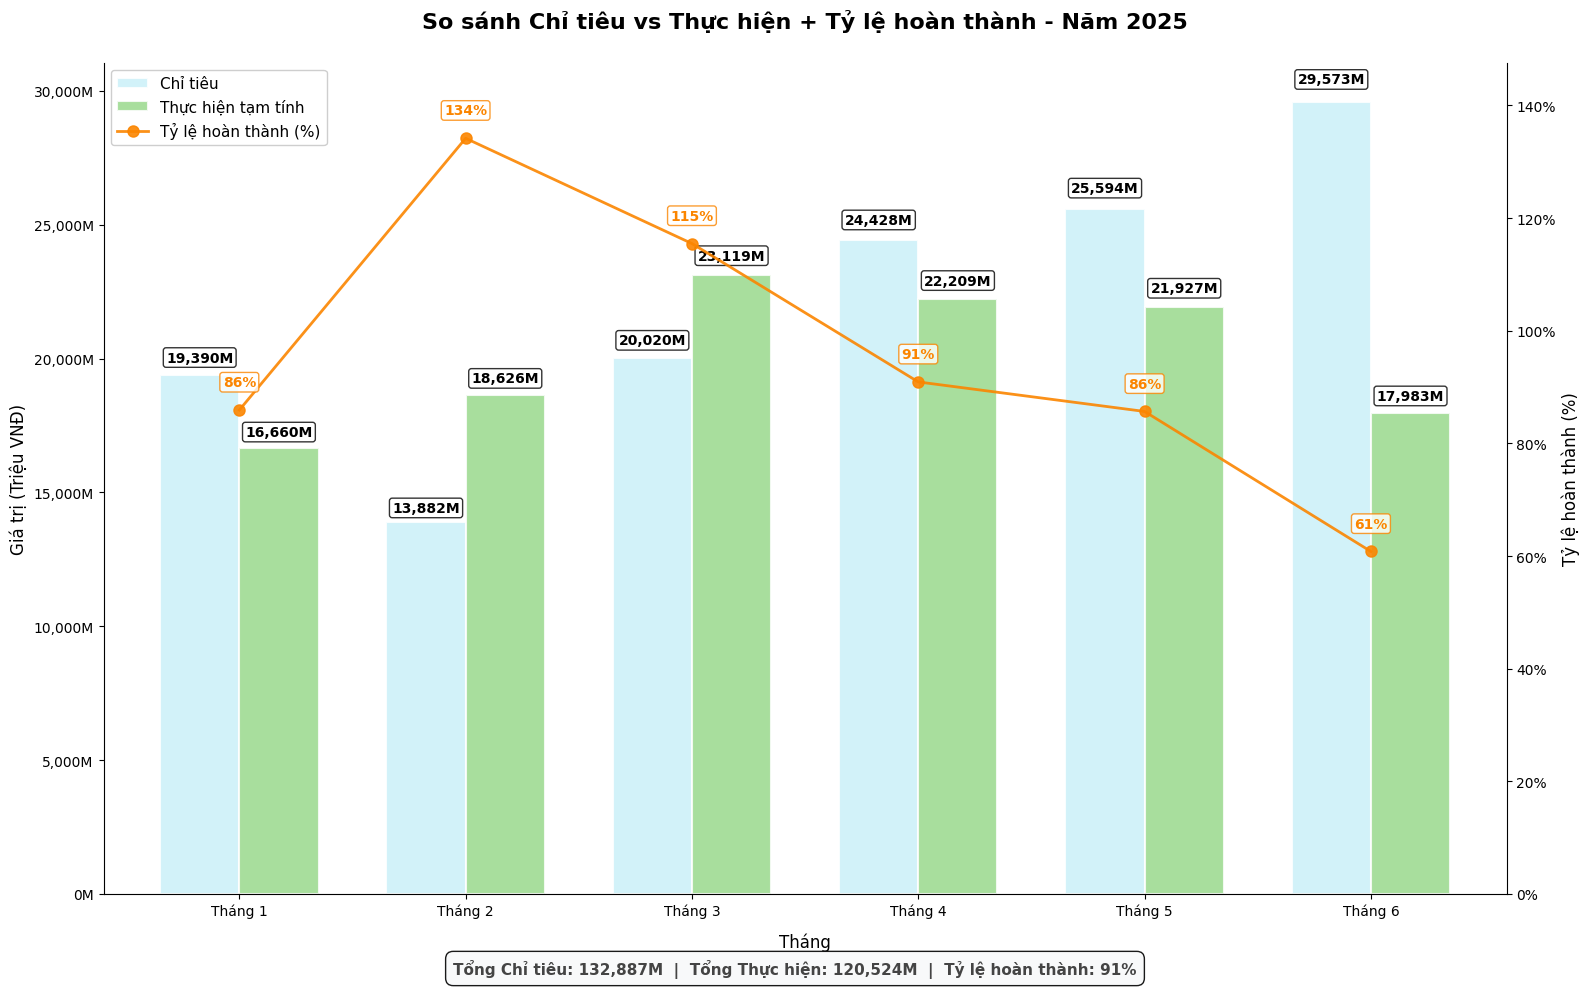

Đã lưu biểu đồ cải tiến tại: /content/drive/MyDrive/Colab Notebooks/hmsg google colab total/02_so_sanh_cai_tien_2025.png

THỐNG KÊ CHI TIẾT NĂM 2025:
Khoảng thời gian: Tháng 1 - 6
Tổng chỉ tiêu: 132,887 triệu VNĐ
Tổng thực hiện: 120,524 triệu VNĐ
Tỷ lệ hoàn thành tổng: 91%
Số tháng có dữ liệu: 6

CHI TIẾT TỪNG THÁNG:
Tháng 1: 19,390M (CT) → 16,660M (TH) = 86% Chưa đạt
Tháng 2: 13,882M (CT) → 18,626M (TH) = 134% Vượt mục tiêu
Tháng 3: 20,020M (CT) → 23,119M (TH) = 115% Vượt mục tiêu
Tháng 4: 24,428M (CT) → 22,209M (TH) = 91% Gần đạt
Tháng 5: 25,594M (CT) → 21,927M (TH) = 86% Chưa đạt
Tháng 6: 29,573M (CT) → 17,983M (TH) = 61% Chưa đạt


In [53]:
# --- [7. Biểu đồ cột: So sánh Thực hiện vs Chỉ tiêu năm 2025 - Cải tiến] ---

# === CẤU HÌNH CƠ BẢN ===
# Điều kiện lọc dữ liệu
YEAR_FILTER = 2025
MONTHS_RANGE = [1, 2, 3, 4, 5, 6]  # Dễ dàng thay đổi: [1,2,3,4,5,6,7,8...] khi có thêm dữ liệu

# Màu sắc cải tiến theo yêu cầu
COLOR_CHI_TIEU = '#caf0f8'        # Xanh nhạt cho chỉ tiêu
COLOR_THUC_HIEN = '#99d98c'       # Xanh lá cho thực hiện
COLOR_PERCENT_LINE = '#fb8500'    # Cam cho đường %

# Cấu hình biểu đồ
FIGURE_SIZE = (16, 10)
BAR_WIDTH = 0.35
FONT_SIZE_TITLE = 16
FONT_SIZE_LABEL = 12
FONT_SIZE_LEGEND = 11

# === LỌC VÀ CHUẨN BỊ DỮ LIỆU ===
print("Đang chuẩn bị dữ liệu...")

# Lọc dữ liệu theo điều kiện
df_filtered = df[
    (df['nam'] == YEAR_FILTER) &
    (df['thang'].isin(MONTHS_RANGE))
].copy()

print(f"Đã lọc {len(df_filtered)} bản ghi cho năm {YEAR_FILTER}, tháng {MONTHS_RANGE[0]}-{MONTHS_RANGE[-1]}")

# Tổng hợp dữ liệu theo tháng
monthly_data = df_filtered.groupby('thang').agg({
    'thuc hien tam tinh': 'sum',
    'chi tieu': 'sum'
}).reset_index()

# Chuyển đổi đơn vị (VNĐ -> Triệu VNĐ)
monthly_data['thuc_hien_M'] = monthly_data['thuc hien tam tinh'] / 1_000_000
monthly_data['chi_tieu_M'] = monthly_data['chi tieu'] / 1_000_000

# Tính tỷ lệ hoàn thành cho từng tháng
monthly_data['ty_le_percent'] = (monthly_data['thuc_hien_M'] / monthly_data['chi_tieu_M']) * 100

print("Dữ liệu đã chuẩn bị:")
display(monthly_data[['thang', 'chi_tieu_M', 'thuc_hien_M', 'ty_le_percent']])

# === TẠO BIỂU ĐỒ ===
fig, ax1 = plt.subplots(figsize=FIGURE_SIZE)

# Vị trí các cột
x_positions = monthly_data['thang']
x_indices = np.arange(len(x_positions))

# Vẽ cột - CHỈ TIÊU TRƯỚC, THỰC HIỆN SAU
bars_chi_tieu = ax1.bar(x_indices - BAR_WIDTH/2, monthly_data['chi_tieu_M'],
                       BAR_WIDTH, label='Chỉ tiêu',
                       color=COLOR_CHI_TIEU, alpha=0.85, edgecolor='white', linewidth=1.5)

bars_thuc_hien = ax1.bar(x_indices + BAR_WIDTH/2, monthly_data['thuc_hien_M'],
                        BAR_WIDTH, label='Thực hiện tạm tính',
                        color=COLOR_THUC_HIEN, alpha=0.85, edgecolor='white', linewidth=1.5)

# === THÊM ĐƯỜNG TỶ LỆ % ===
# Tạo trục y thứ hai cho %
ax2 = ax1.twinx()

# Vẽ đường % - nét mỏng, có chấm ở giữa 2 cột
ax2.plot(x_indices, monthly_data['ty_le_percent'],
         color=COLOR_PERCENT_LINE, linewidth=2, marker='o', markersize=8,
         label='Tỷ lệ hoàn thành (%)', linestyle='-', alpha=0.9)

# === TÙNG CHỈNH BIỂU ĐỒ ===
# Tiêu đề và nhãn
ax1.set_title(f'So sánh Chỉ tiêu vs Thực hiện + Tỷ lệ hoàn thành - Năm {YEAR_FILTER}',
              fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=25)
ax1.set_xlabel('Tháng', fontsize=FONT_SIZE_LABEL, labelpad=10)
ax1.set_ylabel('Giá trị (Triệu VNĐ)', fontsize=FONT_SIZE_LABEL, color='black')
ax2.set_ylabel('Tỷ lệ hoàn thành (%)', fontsize=FONT_SIZE_LABEL, color='black')  # Đổi màu đen

# Trục x - GIẢI QUYẾT CHỒNG LẤN NHÃN
month_labels = [f'Tháng {int(month)}' for month in x_positions]
ax1.set_xticks(x_indices)
ax1.set_xticklabels(month_labels, rotation=0, ha='center')  # Không xoay, căn giữa

# Tăng khoảng cách giữa các cột
ax1.set_xlim(-0.6, len(x_indices)-0.4)

# Thiết lập trục y2 bắt đầu từ 0%
ax2.set_ylim(0, max(monthly_data['ty_le_percent']) * 1.1)

# Legend kết hợp
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
          fontsize=FONT_SIZE_LEGEND, loc='upper left', framealpha=0.95)

# Loại bỏ viền không cần thiết
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax1.spines['bottom'].set_color('#DDDDDD')

# Màu cho trục y của % - đổi thành đen
ax2.tick_params(axis='y', labelcolor='black')
ax2.spines['right'].set_color('black')

# === THÊM GIÁ TRỊ LÊN ĐỈNH CỘT ===
def add_value_labels_improved(bars, values, offset_y=0.02):
    """Thêm giá trị lên đỉnh mỗi cột với offset tùy chỉnh"""
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*offset_y,
                f'{value:,.0f}M', ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

add_value_labels_improved(bars_chi_tieu, monthly_data['chi_tieu_M'], 0.02)
add_value_labels_improved(bars_thuc_hien, monthly_data['thuc_hien_M'], 0.02)

# Thêm giá trị % lên điểm - Làm tròn số nguyên
for i, (x, y) in enumerate(zip(x_indices, monthly_data['ty_le_percent'])):
    ax2.annotate(f'{y:.0f}%', xy=(x, y), xytext=(0, 15),
                textcoords='offset points', ha='center', va='bottom',
                fontsize=10, fontweight='bold', color=COLOR_PERCENT_LINE,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8,
                         edgecolor=COLOR_PERCENT_LINE))

# === ĐỊNH DẠNG TRỤC Y ===
def format_millions(x, p):
    """Format trục y hiển thị triệu"""
    return f'{x:,.0f}M'

ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# === THÊM THÔNG TIN TỔNG QUAN ===
total_thuc_hien = monthly_data['thuc_hien_M'].sum()
total_chi_tieu = monthly_data['chi_tieu_M'].sum()
ti_le_hoan_thanh_tong = (total_thuc_hien / total_chi_tieu) * 100 if total_chi_tieu > 0 else 0

# Thêm subtitle với thông tin tổng quan - BỎ ICON
subtitle_text = (f'Tổng Chỉ tiêu: {total_chi_tieu:,.0f}M  |  '
                f'Tổng Thực hiện: {total_thuc_hien:,.0f}M  |  '
                f'Tỷ lệ hoàn thành: {ti_le_hoan_thanh_tong:.0f}%')

plt.figtext(0.5, 0.02, subtitle_text, ha='center', fontsize=11,
           color='#444444', weight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='#f8f9fa', alpha=0.9))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Tạo thêm không gian cho subtitle

# === LƯU ẢNH ===
img_path = os.path.join(IMG_DIR, f'02_so_sanh_cai_tien_{YEAR_FILTER}.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"Đã lưu biểu đồ cải tiến tại: {img_path}")

# === THỐNG KÊ CHI TIẾT ===
print(f"\nTHỐNG KÊ CHI TIẾT NĂM {YEAR_FILTER}:")
print(f"Khoảng thời gian: Tháng {MONTHS_RANGE[0]} - {MONTHS_RANGE[-1]}")
print(f"Tổng chỉ tiêu: {total_chi_tieu:,.0f} triệu VNĐ")
print(f"Tổng thực hiện: {total_thuc_hien:,.0f} triệu VNĐ")
print(f"Tỷ lệ hoàn thành tổng: {ti_le_hoan_thanh_tong:.0f}%")
print(f"Số tháng có dữ liệu: {len(monthly_data)}")

# Chi tiết từng tháng - BỎ ICON
print(f"\nCHI TIẾT TỪNG THÁNG:")
for _, row in monthly_data.iterrows():
    thang = int(row['thang'])
    chi_tieu = row['chi_tieu_M']
    thuc_hien = row['thuc_hien_M']
    ty_le = row['ty_le_percent']

    if ty_le >= 100:
        status = "Vượt mục tiêu"
    elif ty_le >= 90:
        status = "Gần đạt"
    else:
        status = "Chưa đạt"

    print(f"Tháng {thang}: {chi_tieu:,.0f}M (CT) → {thuc_hien:,.0f}M (TH) = {ty_le:.0f}% {status}")

Đang chuẩn bị dữ liệu...
Đã lọc 75 bản ghi cho năm 2025, tháng 1-6
Ngày hiện tại: 25/06/2025
Thông tin tháng 6:
- Tổng ngày làm việc: 25
- Ngày đã qua: 21
- Ngày còn lại: 4
- Doanh thu TB/ngày: 856.3M
- Dự báo còn lại: 3,425.4M
- Tổng dự báo tháng: 21,408.5M
- Tỷ lệ dự báo: 72%
Dữ liệu đã chuẩn bị:


,thang,chi_tieu_M,thuc_hien_M,du_bao_con_lai,ty_le_percent,ty_le_du_bao
0,1,19390.0,16660.312037,0.000000,85.922187,85.922187
1,2,13882.0,18625.635352,0.000000,134.171123,134.171123
2,3,20020.0,23119.247510,0.000000,115.480757,115.480757
3,4,24428.1,22208.748243,0.000000,90.914759,90.914759
4,5,25594.1,21926.860079,0.000000,85.671542,85.671542
5,6,29573.1,17983.112083,3425.354682,60.809019,72.391690


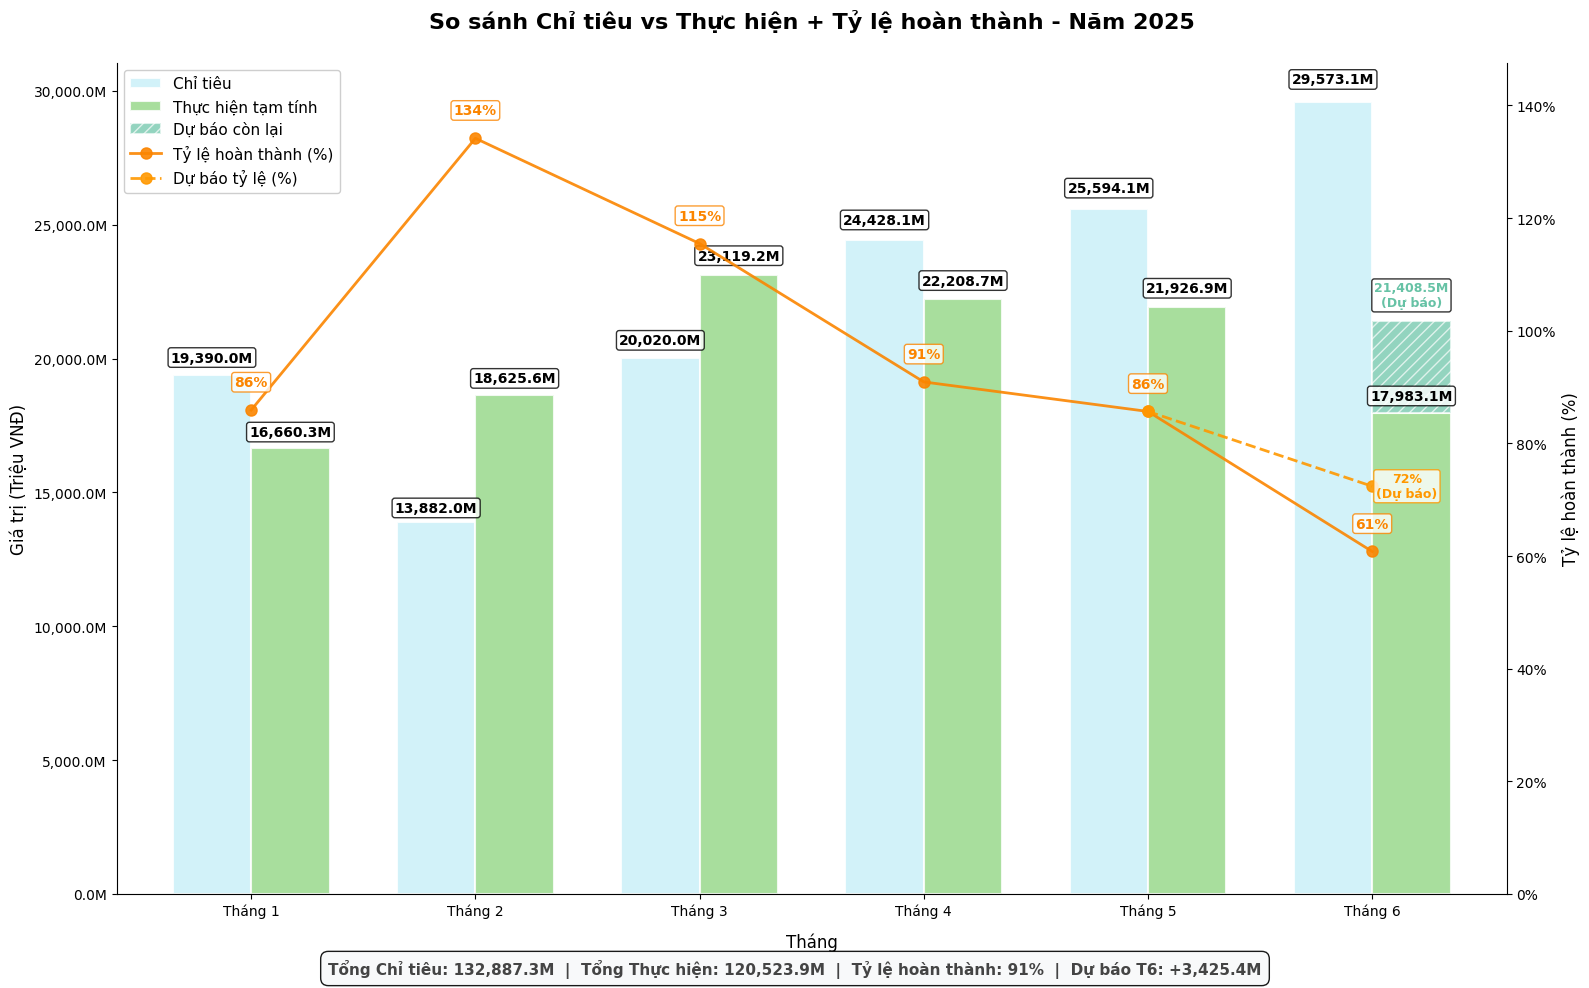

Đã lưu biểu đồ hoàn thiện tại: /content/drive/MyDrive/Colab Notebooks/hmsg google colab total/02_so_sanh_hoan_thien_2025.png

THỐNG KÊ CHI TIẾT NĂM 2025:
Khoảng thời gian: Tháng 1 - 6
Tổng chỉ tiêu: 132,887.3 triệu VNĐ
Tổng thực hiện: 120,523.9 triệu VNĐ
Tỷ lệ hoàn thành tổng: 91%
Dự báo tháng 6: 21,408.5M (hiện tại: 17,983.1M + dự báo: 3,425.4M)
Tỷ lệ dự báo tháng 6: 72%


In [54]:
# --- [7. Biểu đồ cột: So sánh Thực hiện vs Chỉ tiêu năm 2025 - Hoàn thiện] ---

import datetime
import numpy as np

# === CẤU HÌNH CƠ BẢN ===
# Điều kiện lọc dữ liệu
YEAR_FILTER = 2025
MONTHS_RANGE = [1, 2, 3, 4, 5, 6]  # Dễ dàng thay đổi: [1,2,3,4,5,6,7,8...] khi có thêm dữ liệu

# Màu sắc cải tiến theo yêu cầu
COLOR_CHI_TIEU = '#caf0f8'        # Xanh nhạt cho chỉ tiêu
COLOR_THUC_HIEN = '#99d98c'       # Xanh lá cho thực hiện
COLOR_PERCENT_LINE = '#fb8500'    # Cam cho đường %
COLOR_DU_BAO = '#66c2a5'          # Xanh lá nhạt hơn cho phần dự báo
COLOR_PERCENT_DU_BAO = '#ff9800'  # Cam đậm cho % dự báo

# Cấu hình biểu đồ
FIGURE_SIZE = (16, 10)
BAR_WIDTH = 0.35
FONT_SIZE_TITLE = 16
FONT_SIZE_LABEL = 12
FONT_SIZE_LEGEND = 11

# === TÍNH TOÁN NGÀY LÀM VIỆC (BAO GỒM THỨ 7) ===
def tinh_ngay_lam_viec(nam, thang, ngay_hien_tai=None):
    """
    Tính số ngày làm việc trong tháng (Thứ 2 - Thứ 7) và số ngày đã qua
    """
    from datetime import datetime, timedelta
    import calendar

    # Nếu không truyền ngày hiện tại, lấy ngày hôm nay
    if ngay_hien_tai is None:
        ngay_hien_tai = datetime.now().day

    # Tổng số ngày trong tháng
    so_ngay_trong_thang = calendar.monthrange(nam, thang)[1]

    # Tính số ngày làm việc trong tháng (loại bỏ chỉ chủ nhật)
    ngay_lam_viec_trong_thang = 0
    ngay_lam_viec_da_qua = 0

    for ngay in range(1, so_ngay_trong_thang + 1):
        ngay_trong_tuan = datetime(nam, thang, ngay).weekday()

        # Weekday: 0=Monday, 6=Sunday. Tính Mon-Sat (loại bỏ chỉ Sunday)
        if ngay_trong_tuan < 6:  # Monday to Saturday
            ngay_lam_viec_trong_thang += 1

            # Nếu ngày này đã qua
            if ngay <= ngay_hien_tai:
                ngay_lam_viec_da_qua += 1

    ngay_lam_viec_con_lai = ngay_lam_viec_trong_thang - ngay_lam_viec_da_qua

    return {
        'tong_ngay_lam_viec': ngay_lam_viec_trong_thang,
        'ngay_da_qua': ngay_lam_viec_da_qua,
        'ngay_con_lai': ngay_lam_viec_con_lai
    }

# === LỌC VÀ CHUẨN BỊ DỮ LIỆU ===
print("Đang chuẩn bị dữ liệu...")

# Lọc dữ liệu theo điều kiện
df_filtered = df[
    (df['nam'] == YEAR_FILTER) &
    (df['thang'].isin(MONTHS_RANGE))
].copy()

print(f"Đã lọc {len(df_filtered)} bản ghi cho năm {YEAR_FILTER}, tháng {MONTHS_RANGE[0]}-{MONTHS_RANGE[-1]}")

# Tổng hợp dữ liệu theo tháng
monthly_data = df_filtered.groupby('thang').agg({
    'thuc hien tam tinh': 'sum',
    'chi tieu': 'sum'
}).reset_index()

# Chuyển đổi đơn vị (VNĐ -> Triệu VNĐ)
monthly_data['thuc_hien_M'] = monthly_data['thuc hien tam tinh'] / 1_000_000
monthly_data['chi_tieu_M'] = monthly_data['chi tieu'] / 1_000_000

# Tính tỷ lệ hoàn thành cho từng tháng
monthly_data['ty_le_percent'] = (monthly_data['thuc_hien_M'] / monthly_data['chi_tieu_M']) * 100

# === TÍNH DỰ BÁO CHO THÁNG HIỆN TẠI ===
# Lấy tháng và ngày hiện tại tự động
today = datetime.datetime.now()
thang_hien_tai = today.month
ngay_hien_tai = today.day

print(f"Ngày hiện tại: {today.strftime('%d/%m/%Y')}")

# Kiểm tra xem tháng hiện tại có trong dữ liệu không
if thang_hien_tai in monthly_data['thang'].values:
    # Tính ngày làm việc cho tháng hiện tại
    thong_tin_ngay = tinh_ngay_lam_viec(YEAR_FILTER, thang_hien_tai, ngay_hien_tai)

    print(f"Thông tin tháng {thang_hien_tai}:")
    print(f"- Tổng ngày làm việc: {thong_tin_ngay['tong_ngay_lam_viec']}")
    print(f"- Ngày đã qua: {thong_tin_ngay['ngay_da_qua']}")
    print(f"- Ngày còn lại: {thong_tin_ngay['ngay_con_lai']}")

    # Tính doanh thu trung bình 1 ngày của tháng hiện tại
    thuc_hien_thang_hien_tai = monthly_data[monthly_data['thang'] == thang_hien_tai]['thuc_hien_M'].iloc[0]
    chi_tieu_thang_hien_tai = monthly_data[monthly_data['thang'] == thang_hien_tai]['chi_tieu_M'].iloc[0]

    doanh_thu_1_ngay = thuc_hien_thang_hien_tai / thong_tin_ngay['ngay_da_qua'] if thong_tin_ngay['ngay_da_qua'] > 0 else 0

    # Ước tính doanh thu còn lại
    du_bao_con_lai = doanh_thu_1_ngay * thong_tin_ngay['ngay_con_lai']
    tong_du_bao = thuc_hien_thang_hien_tai + du_bao_con_lai

    # Tính % dự báo
    ty_le_du_bao = (tong_du_bao / chi_tieu_thang_hien_tai) * 100 if chi_tieu_thang_hien_tai > 0 else 0

    print(f"- Doanh thu TB/ngày: {doanh_thu_1_ngay:,.1f}M")
    print(f"- Dự báo còn lại: {du_bao_con_lai:,.1f}M")
    print(f"- Tổng dự báo tháng: {tong_du_bao:,.1f}M")
    print(f"- Tỷ lệ dự báo: {ty_le_du_bao:.0f}%")

    # Thêm cột dự báo vào data
    monthly_data['du_bao_con_lai'] = 0
    monthly_data['ty_le_du_bao'] = monthly_data['ty_le_percent'].copy()

    monthly_data.loc[monthly_data['thang'] == thang_hien_tai, 'du_bao_con_lai'] = du_bao_con_lai
    monthly_data.loc[monthly_data['thang'] == thang_hien_tai, 'ty_le_du_bao'] = ty_le_du_bao
else:
    print(f"Tháng hiện tại ({thang_hien_tai}) không có trong dữ liệu")
    monthly_data['du_bao_con_lai'] = 0
    monthly_data['ty_le_du_bao'] = monthly_data['ty_le_percent'].copy()

print("Dữ liệu đã chuẩn bị:")
display(monthly_data[['thang', 'chi_tieu_M', 'thuc_hien_M', 'du_bao_con_lai', 'ty_le_percent', 'ty_le_du_bao']])

# === TẠO BIỂU ĐỒ ===
fig, ax1 = plt.subplots(figsize=FIGURE_SIZE)

# Vị trí các cột
x_positions = monthly_data['thang']
x_indices = np.arange(len(x_positions))

# Vẽ cột - CHỈ TIÊU TRƯỚC, THỰC HIỆN SAU
bars_chi_tieu = ax1.bar(x_indices - BAR_WIDTH/2, monthly_data['chi_tieu_M'],
                       BAR_WIDTH, label='Chỉ tiêu',
                       color=COLOR_CHI_TIEU, alpha=0.85, edgecolor='white', linewidth=1.5)

bars_thuc_hien = ax1.bar(x_indices + BAR_WIDTH/2, monthly_data['thuc_hien_M'],
                        BAR_WIDTH, label='Thực hiện tạm tính',
                        color=COLOR_THUC_HIEN, alpha=0.85, edgecolor='white', linewidth=1.5)

# === THÊM PHẦN DỰ BÁO CHO THÁNG HIỆN TẠI ===
# Tìm vị trí tháng hiện tại
idx_thang_hien_tai = np.where(monthly_data['thang'] == thang_hien_tai)[0]
if len(idx_thang_hien_tai) > 0:
    idx = idx_thang_hien_tai[0]

    # Vẽ phần dự báo nối tiếp (nét đứt)
    thuc_hien_hien_tai = monthly_data.iloc[idx]['thuc_hien_M']
    du_bao = monthly_data.iloc[idx]['du_bao_con_lai']

    # Vẽ cột dự báo nối tiếp phía trên
    bars_du_bao = ax1.bar(x_indices[idx] + BAR_WIDTH/2, du_bao,
                         BAR_WIDTH, bottom=thuc_hien_hien_tai,
                         label='Dự báo còn lại',
                         color=COLOR_DU_BAO, alpha=0.7,
                         edgecolor='white', linewidth=1.5,
                         hatch='///')

# === THÊM ĐƯỜNG TỶ LỆ % ===
# Tạo trục y thứ hai cho %
ax2 = ax1.twinx()

# Vẽ đường % thực tế - nét liền
ax2.plot(x_indices, monthly_data['ty_le_percent'],
         color=COLOR_PERCENT_LINE, linewidth=2, marker='o', markersize=8,
         label='Tỷ lệ hoàn thành (%)', linestyle='-', alpha=0.9)

# Vẽ đường % dự báo - nét đứt cho tháng hiện tại
if len(idx_thang_hien_tai) > 0:
    idx = idx_thang_hien_tai[0]

    # Đường nét đứt từ tháng trước đến tháng hiện tại (dự báo)
    if idx > 0:
        # Lấy 2 điểm: tháng trước và tháng hiện tại (dự báo)
        x_du_bao = [x_indices[idx-1], x_indices[idx]]
        y_du_bao = [monthly_data.iloc[idx-1]['ty_le_percent'], monthly_data.iloc[idx]['ty_le_du_bao']]

        ax2.plot(x_du_bao, y_du_bao,
                color=COLOR_PERCENT_DU_BAO, linewidth=2, marker='o', markersize=8,
                label='Dự báo tỷ lệ (%)', linestyle='--', alpha=0.9)

# === TÙNG CHỈNH BIỂU ĐỒ ===
# Tiêu đề và nhãn
ax1.set_title(f'So sánh Chỉ tiêu vs Thực hiện + Tỷ lệ hoàn thành - Năm {YEAR_FILTER}',
              fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=25)
ax1.set_xlabel('Tháng', fontsize=FONT_SIZE_LABEL, labelpad=10)
ax1.set_ylabel('Giá trị (Triệu VNĐ)', fontsize=FONT_SIZE_LABEL, color='black')
ax2.set_ylabel('Tỷ lệ hoàn thành (%)', fontsize=FONT_SIZE_LABEL, color='black')

# Trục x - GIẢI QUYẾT CHỒNG LẤN NHÃN
month_labels = [f'Tháng {int(month)}' for month in x_positions]
ax1.set_xticks(x_indices)
ax1.set_xticklabels(month_labels, rotation=0, ha='center')

# Tăng khoảng cách giữa các cột
ax1.set_xlim(-0.6, len(x_indices)-0.4)

# Thiết lập trục y2 bắt đầu từ 0%
max_percent = max(max(monthly_data['ty_le_percent']), max(monthly_data['ty_le_du_bao']))
ax2.set_ylim(0, max_percent * 1.1)

# Legend kết hợp
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
          fontsize=FONT_SIZE_LEGEND, loc='upper left', framealpha=0.95)

# Loại bỏ viền không cần thiết
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax1.spines['bottom'].set_color('#DDDDDD')

# Màu cho trục y của % - đen
ax2.tick_params(axis='y', labelcolor='black')
ax2.spines['right'].set_color('black')

# === THÊM GIÁ TRỊ LÊN ĐỈNH CỘT - ĐỊNH DẠNG DẤU PHẨY ===
def add_value_labels_improved(bars, values, offset_y=0.02):
    """Thêm giá trị lên đỉnh mỗi cột với định dạng dấu phẩy"""
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*offset_y,
                f'{value:,.1f}M', ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

add_value_labels_improved(bars_chi_tieu, monthly_data['chi_tieu_M'], 0.02)
add_value_labels_improved(bars_thuc_hien, monthly_data['thuc_hien_M'], 0.02)

# Thêm label cho phần dự báo
if len(idx_thang_hien_tai) > 0:
    idx = idx_thang_hien_tai[0]
    tong_thuc_hien_du_bao = monthly_data.iloc[idx]['thuc_hien_M'] + monthly_data.iloc[idx]['du_bao_con_lai']

    # Label cho tổng (thực hiện + dự báo) với định dạng dấu phẩy
    ax1.text(x_indices[idx] + BAR_WIDTH/2, tong_thuc_hien_du_bao + tong_thuc_hien_du_bao*0.02,
            f'{tong_thuc_hien_du_bao:,.1f}M\n(Dự báo)', ha='center', va='bottom',
            fontsize=9, fontweight='bold', color=COLOR_DU_BAO,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Thêm giá trị % lên điểm
for i, (x, y) in enumerate(zip(x_indices, monthly_data['ty_le_percent'])):
    ax2.annotate(f'{y:.0f}%', xy=(x, y), xytext=(0, 15),
                textcoords='offset points', ha='center', va='bottom',
                fontsize=10, fontweight='bold', color=COLOR_PERCENT_LINE,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8,
                         edgecolor=COLOR_PERCENT_LINE))

# Thêm % dự báo cho tháng hiện tại
if len(idx_thang_hien_tai) > 0:
    idx = idx_thang_hien_tai[0]
    y_du_bao = monthly_data.iloc[idx]['ty_le_du_bao']
    ax2.annotate(f'{y_du_bao:.0f}%\n(Dự báo)', xy=(x_indices[idx], y_du_bao), xytext=(25, 0),
                textcoords='offset points', ha='center', va='center',
                fontsize=9, fontweight='bold', color=COLOR_PERCENT_DU_BAO,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8,
                         edgecolor=COLOR_PERCENT_DU_BAO))

# === ĐỊNH DẠNG TRỤC Y ===
def format_millions(x, p):
    """Format trục y hiển thị triệu với dấu phẩy"""
    return f'{x:,.1f}M'

ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# === THÊM THÔNG TIN TỔNG QUAN ===
total_thuc_hien = monthly_data['thuc_hien_M'].sum()
total_chi_tieu = monthly_data['chi_tieu_M'].sum()
ti_le_hoan_thanh_tong = (total_thuc_hien / total_chi_tieu) * 100 if total_chi_tieu > 0 else 0

# Thông tin dự báo cho subtitle
du_bao_text = ""
if len(idx_thang_hien_tai) > 0:
    du_bao_text = f"  |  Dự báo T{thang_hien_tai}: +{du_bao_con_lai:,.1f}M"

# Thêm subtitle với thông tin tổng quan
subtitle_text = (f'Tổng Chỉ tiêu: {total_chi_tieu:,.1f}M  |  '
                f'Tổng Thực hiện: {total_thuc_hien:,.1f}M  |  '
                f'Tỷ lệ hoàn thành: {ti_le_hoan_thanh_tong:.0f}%{du_bao_text}')

plt.figtext(0.5, 0.02, subtitle_text, ha='center', fontsize=11,
           color='#444444', weight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='#f8f9fa', alpha=0.9))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

# === LƯU ẢNH ===
img_path = os.path.join(IMG_DIR, f'02_so_sanh_hoan_thien_{YEAR_FILTER}.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"Đã lưu biểu đồ hoàn thiện tại: {img_path}")

# === THỐNG KÊ CHI TIẾT ===
print(f"\nTHỐNG KÊ CHI TIẾT NĂM {YEAR_FILTER}:")
print(f"Khoảng thời gian: Tháng {MONTHS_RANGE[0]} - {MONTHS_RANGE[-1]}")
print(f"Tổng chỉ tiêu: {total_chi_tieu:,.1f} triệu VNĐ")
print(f"Tổng thực hiện: {total_thuc_hien:,.1f} triệu VNĐ")
print(f"Tỷ lệ hoàn thành tổng: {ti_le_hoan_thanh_tong:.0f}%")

if len(idx_thang_hien_tai) > 0:
    print(f"Dự báo tháng {thang_hien_tai}: {tong_du_bao:,.1f}M (hiện tại: {thuc_hien_thang_hien_tai:,.1f}M + dự báo: {du_bao_con_lai:,.1f}M)")
    print(f"Tỷ lệ dự báo tháng {thang_hien_tai}: {ty_le_du_bao:.0f}%")

🔗 Đang kết nối Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Đã kết nối Google Drive thành công!
📅 Ngày hiện tại: 2025-06-25
📊 Phân tích từ tháng 1-6
🔄 Đang chuẩn bị dữ liệu...
✅ Đã lọc 75 bản ghi cho năm 2025
✅ Dữ liệu lũy kế đã sẵn sàng!

🔮 Tính dự báo cho tháng 6...
📅 Ngày làm việc T6: 21 đã qua, 4 còn lại
💰 Lũy kế T5: 102,540.8M
💰 Doanh thu T6 hiện tại: 0.0M
📊 Trung bình 1 ngày: 0.0M
🔮 Dự báo còn lại T6: 0.0M
🎯 Dự báo lũy kế cuối T6: 102,540.8M


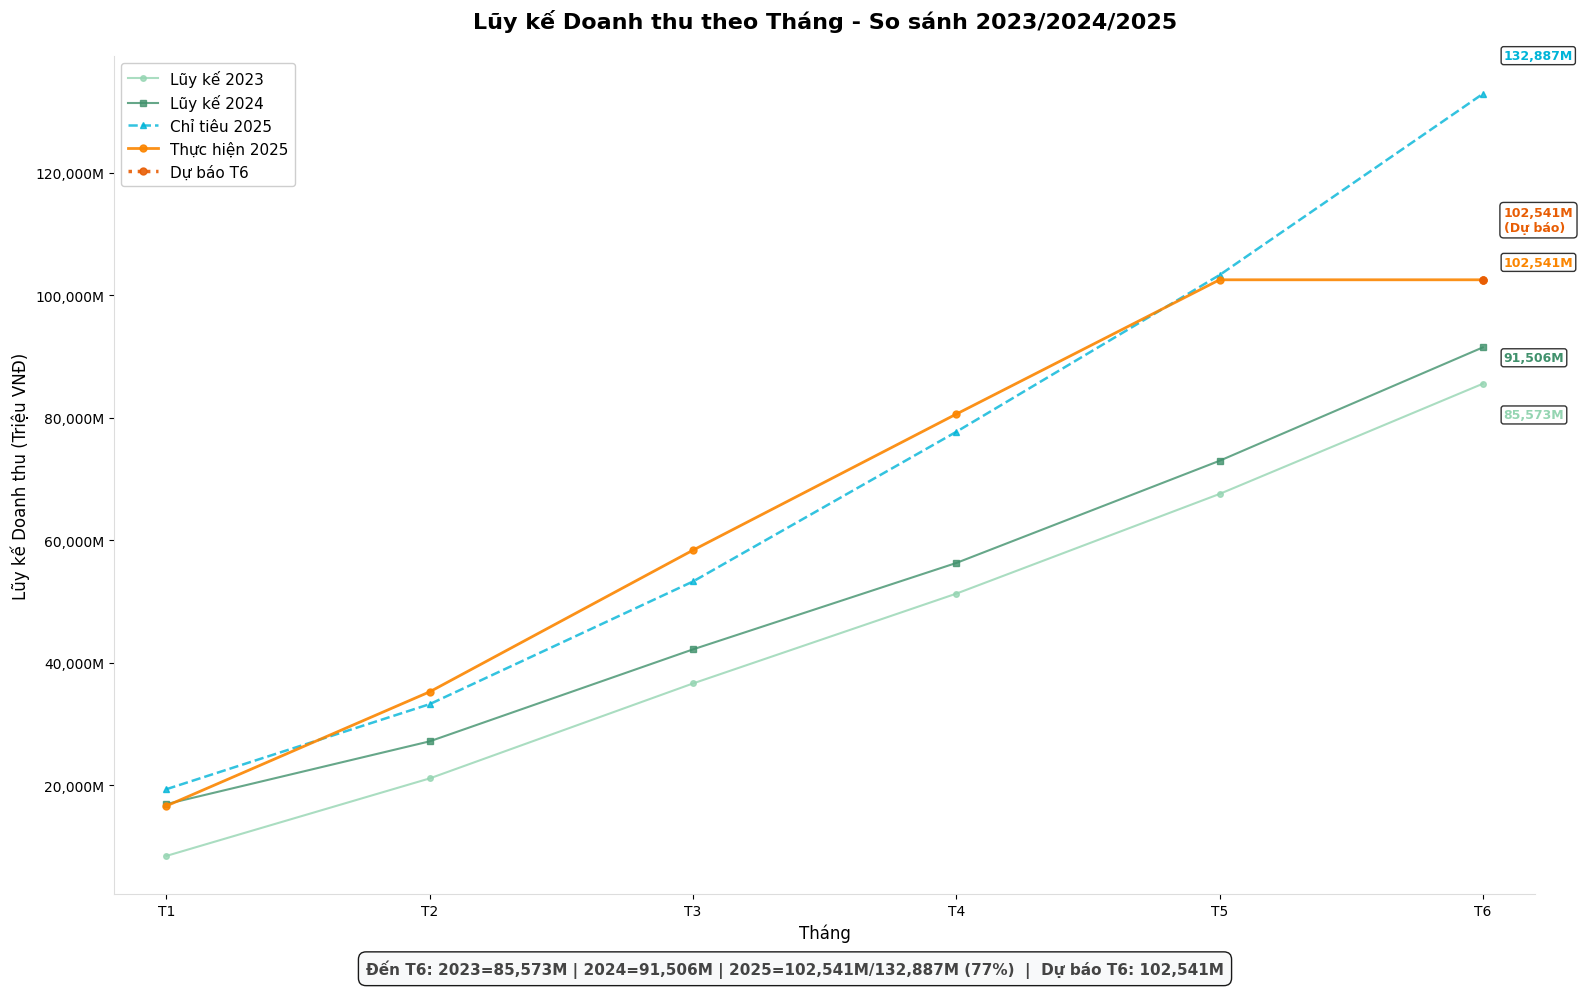

💾 ✅ Đã lưu biểu đồ thành công tại: /content/drive/MyDrive/charts/03_luy_ke_final_polished_2025.png
📁 Kiểm tra trong Google Drive: /MyDrive/charts/

📈 THỐNG KÊ FINAL:
📊 Lũy kế 2023 (T6): 85,573M VNĐ
📊 Lũy kế 2024 (T6): 91,506M VNĐ
🎯 Lũy kế 2025 thực hiện (T6): 102,541M VNĐ
📋 Lũy kế 2025 chỉ tiêu (T6): 132,887M VNĐ
✅ Tiến độ: 77.2%
📈 Tăng trưởng vs 2024: +12.1%
🔮 Dự báo T6: 102,541M VNĐ
🔮 Dự báo tăng trưởng: +12.1%

🎉 FINAL VERSION HOÀN THÀNH!


In [55]:
# === [Biểu đồ lũy kế doanh thu - FIXED VERSION] ===

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive

# === MOUNT GOOGLE DRIVE ===
print("🔗 Đang kết nối Google Drive...")
drive.mount('/content/drive')
print("✅ Đã kết nối Google Drive thành công!")

# === CẤU HÌNH CƠ BẢN ===
today = datetime.datetime.now()
YEAR_FILTER = 2025
CURRENT_MONTH = today.month  # Tháng hiện tại (6)
MAX_MONTH = CURRENT_MONTH
MONTHS_RANGE = list(range(1, MAX_MONTH + 1))  # 1-6

print(f"📅 Ngày hiện tại: {today.strftime('%Y-%m-%d')}")
print(f"📊 Phân tích từ tháng 1-{MAX_MONTH}")

# === MÀU SẮC MỚI THEO YÊU CẦU ===
COLOR_2023 = '#95d5b2'           # Xanh nhạt mới
COLOR_2024 = '#40916c'           # Xanh đậm mới
COLOR_CHI_TIEU_2025 = '#00b4d8'  # Xanh nước biển cho chỉ tiêu
COLOR_THUC_HIEN_2025 = '#fb8500' # Cam cho thực hiện
COLOR_DU_BAO_2025 = '#e85d04'    # Cam đậm cho dự báo

# === CẤU HÌNH BIỂU ĐỒ - ĐƯỜNG MỎNG HƠN ===
FIGURE_SIZE = (16, 10)
FONT_SIZE_TITLE = 16
FONT_SIZE_LABEL = 12
FONT_SIZE_LEGEND = 11

# Độ dày đường mỏng hơn
LINE_WIDTH_THIN = 1.5      # Cho 2023, 2024
LINE_WIDTH_MEDIUM = 1.8    # Cho chỉ tiêu
LINE_WIDTH_THICK = 2.0     # Cho thực hiện
LINE_WIDTH_FORECAST = 2.5  # Cho dự báo

# === HÀM TÍNH NGÀY LÀM VIỆC ===
def tinh_ngay_lam_viec(nam, thang, ngay_hien_tai=None):
    """Tính số ngày làm việc (T2-T7) trong tháng và đã qua"""
    from datetime import datetime
    import calendar

    if ngay_hien_tai is None:
        ngay_hien_tai = datetime.now().day

    so_ngay_trong_thang = calendar.monthrange(nam, thang)[1]
    ngay_lam_viec_trong_thang = 0
    ngay_lam_viec_da_qua = 0

    for ngay in range(1, so_ngay_trong_thang + 1):
        ngay_trong_tuan = datetime(nam, thang, ngay).weekday()
        if ngay_trong_tuan < 6:  # T2-T7
            ngay_lam_viec_trong_thang += 1
            if ngay <= ngay_hien_tai:
                ngay_lam_viec_da_qua += 1

    return {
        'tong_ngay_lam_viec': ngay_lam_viec_trong_thang,
        'ngay_da_qua': ngay_lam_viec_da_qua,
        'ngay_con_lai': ngay_lam_viec_trong_thang - ngay_lam_viec_da_qua
    }

# === CHUẨN BỊ DỮ LIỆU (GIỮ NGUYÊN LOGIC ĐÚNG) ===
print("🔄 Đang chuẩn bị dữ liệu...")

# Lọc dữ liệu không loại bỏ hàng có ô trống
df_2025 = df[
    (df['nam'] == YEAR_FILTER) &
    (df['thang'].isin(MONTHS_RANGE))
].copy()

print(f"✅ Đã lọc {len(df_2025)} bản ghi cho năm {YEAR_FILTER}")

# Thay giá trị trống = 0
columns_to_fill = ['thuc hien', 'chi tieu', 'doanh thu 2024', 'doanh thu 2023']
for col in columns_to_fill:
    if col in df_2025.columns:
        df_2025[col] = df_2025[col].fillna(0)

# Tính tổng doanh số theo tháng
monthly_totals = df_2025.groupby('thang').agg({
    'doanh thu 2023': 'sum',
    'doanh thu 2024': 'sum',
    'chi tieu': 'sum',
    'thuc hien': 'sum'
}).reset_index()

# Tính lũy kế
monthly_data = monthly_totals.copy()

# Chuyển sang triệu VNĐ
monthly_data['monthly_2023'] = monthly_data['doanh thu 2023'] / 1_000_000
monthly_data['monthly_2024'] = monthly_data['doanh thu 2024'] / 1_000_000
monthly_data['monthly_2025_chi_tieu'] = monthly_data['chi tieu'] / 1_000_000
monthly_data['monthly_2025_thuc_hien'] = monthly_data['thuc hien'] / 1_000_000

# Tính lũy kế bằng cumsum()
monthly_data['luy_ke_2023'] = monthly_data['monthly_2023'].cumsum()
monthly_data['luy_ke_2024'] = monthly_data['monthly_2024'].cumsum()
monthly_data['luy_ke_2025_chi_tieu'] = monthly_data['monthly_2025_chi_tieu'].cumsum()
monthly_data['luy_ke_2025_thuc_hien'] = monthly_data['monthly_2025_thuc_hien'].cumsum()

print("✅ Dữ liệu lũy kế đã sẵn sàng!")

# === TÍNH DỰ BÁO CHO THÁNG HIỆN TẠI - LOGIC ĐÚNG ===
thang_hien_tai = CURRENT_MONTH
du_bao_luy_ke = None
du_bao_con_lai = 0

if thang_hien_tai in monthly_data['thang'].values:
    print(f"\n🔮 Tính dự báo cho tháng {thang_hien_tai}...")

    # Tính ngày làm việc cho tháng hiện tại
    thong_tin_ngay = tinh_ngay_lam_viec(YEAR_FILTER, thang_hien_tai, today.day)

    # Lấy doanh thu tháng hiện tại đã thực hiện
    thuc_hien_thang_hien_tai = monthly_data.loc[monthly_data['thang'] == thang_hien_tai, 'monthly_2025_thuc_hien'].iloc[0]

    # Lấy lũy kế tháng trước (T5)
    if thang_hien_tai > 1:
        luy_ke_thang_truoc = monthly_data.loc[monthly_data['thang'] == (thang_hien_tai-1), 'luy_ke_2025_thuc_hien'].iloc[0]
    else:
        luy_ke_thang_truoc = 0

    # Tính dự báo theo logic chuẩn (như biểu đồ cột)
    if thong_tin_ngay['ngay_da_qua'] > 0 and thong_tin_ngay['ngay_con_lai'] > 0:
        # Doanh thu trung bình 1 ngày = doanh thu tháng đã thực hiện / số ngày đã qua
        doanh_thu_1_ngay = thuc_hien_thang_hien_tai / thong_tin_ngay['ngay_da_qua']

        # Dự báo doanh thu còn lại = doanh thu 1 ngày × số ngày còn lại
        du_bao_con_lai = doanh_thu_1_ngay * thong_tin_ngay['ngay_con_lai']

        # Dự báo lũy kế cuối tháng = lũy kế tháng trước + doanh thu tháng hiện tại + dự báo còn lại
        du_bao_luy_ke = luy_ke_thang_truoc + thuc_hien_thang_hien_tai + du_bao_con_lai

        print(f"📅 Ngày làm việc T{thang_hien_tai}: {thong_tin_ngay['ngay_da_qua']} đã qua, {thong_tin_ngay['ngay_con_lai']} còn lại")
        print(f"💰 Lũy kế T{thang_hien_tai-1}: {luy_ke_thang_truoc:,.1f}M")
        print(f"💰 Doanh thu T{thang_hien_tai} hiện tại: {thuc_hien_thang_hien_tai:,.1f}M")
        print(f"📊 Trung bình 1 ngày: {doanh_thu_1_ngay:,.1f}M")
        print(f"🔮 Dự báo còn lại T{thang_hien_tai}: {du_bao_con_lai:,.1f}M")
        print(f"🎯 Dự báo lũy kế cuối T{thang_hien_tai}: {du_bao_luy_ke:,.1f}M")

# === TẠO BIỂU ĐỒ ===
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

# Vẽ các đường lũy kế với màu mới và đường mỏng hơn
x_months = monthly_data['thang']

# Đường 2023 - màu xanh nhạt mới
ax.plot(x_months, monthly_data['luy_ke_2023'],
        color=COLOR_2023, linewidth=LINE_WIDTH_THIN, marker='o', markersize=4,
        label='Lũy kế 2023', alpha=0.8)

# Đường 2024 - màu xanh đậm mới
ax.plot(x_months, monthly_data['luy_ke_2024'],
        color=COLOR_2024, linewidth=LINE_WIDTH_THIN, marker='s', markersize=4,
        label='Lũy kế 2024', alpha=0.8)

# Đường chỉ tiêu 2025
ax.plot(x_months, monthly_data['luy_ke_2025_chi_tieu'],
        color=COLOR_CHI_TIEU_2025, linewidth=LINE_WIDTH_MEDIUM, marker='^', markersize=4,
        label='Chỉ tiêu 2025', linestyle='--', alpha=0.8)

# Đường thực hiện 2025
ax.plot(x_months, monthly_data['luy_ke_2025_thuc_hien'],
        color=COLOR_THUC_HIEN_2025, linewidth=LINE_WIDTH_THICK, marker='o', markersize=5,
        label='Thực hiện 2025', alpha=0.9)

# === VẼ ĐƯỜNG DỰ BÁO NÉT ĐỨT ===
if du_bao_luy_ke is not None and thang_hien_tai <= MAX_MONTH:
    # Lấy điểm lũy kế hiện tại tháng 6
    luy_ke_thang_hien_tai = monthly_data.loc[monthly_data['thang'] == thang_hien_tai, 'luy_ke_2025_thuc_hien'].iloc[0]

    # Vẽ đường dự báo từ T6 hiện tại → T6 dự báo (nét đứt)
    ax.plot([thang_hien_tai, thang_hien_tai], [luy_ke_thang_hien_tai, du_bao_luy_ke],
            color=COLOR_DU_BAO_2025, linewidth=LINE_WIDTH_FORECAST,
            linestyle=':', alpha=0.9, marker='o', markersize=5,
            label=f'Dự báo T{thang_hien_tai}')

# === TÙNG CHỈNH BIỂU ĐỒ ===
ax.set_title(f'Lũy kế Doanh thu theo Tháng - So sánh {YEAR_FILTER-2}/{YEAR_FILTER-1}/{YEAR_FILTER}',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)
ax.set_xlabel('Tháng', fontsize=FONT_SIZE_LABEL)
ax.set_ylabel('Lũy kế Doanh thu (Triệu VNĐ)', fontsize=FONT_SIZE_LABEL)

# Trục x
ax.set_xticks(x_months)
ax.set_xticklabels([f'T{int(m)}' for m in x_months])
ax.set_xlim(x_months.min() - 0.2, x_months.max() + 0.2)

# Legend
ax.legend(fontsize=FONT_SIZE_LEGEND, loc='upper left', framealpha=0.95)

# Loại bỏ viền không cần thiết
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# === ANNOTATIONS ===
def get_annotation_offset(values, index):
    """Tính offset để tránh chồng nhau"""
    sorted_vals = sorted([(i, v) for i, v in enumerate(values)], key=lambda x: x[1])
    offsets = [-25, -10, 10, 25]

    for rank, (original_idx, val) in enumerate(sorted_vals):
        if original_idx == index:
            return offsets[min(rank, len(offsets)-1)]
    return 15

# Annotate điểm cuối tháng 6
month_cuoi = x_months.max()
values_cuoi = [
    monthly_data[monthly_data['thang'] == month_cuoi]['luy_ke_2023'].iloc[0],
    monthly_data[monthly_data['thang'] == month_cuoi]['luy_ke_2024'].iloc[0],
    monthly_data[monthly_data['thang'] == month_cuoi]['luy_ke_2025_chi_tieu'].iloc[0],
    monthly_data[monthly_data['thang'] == month_cuoi]['luy_ke_2025_thuc_hien'].iloc[0]
]

colors = [COLOR_2023, COLOR_2024, COLOR_CHI_TIEU_2025, COLOR_THUC_HIEN_2025]

for i, (val, color) in enumerate(zip(values_cuoi, colors)):
    offset_y = get_annotation_offset(values_cuoi, i)
    ax.annotate(f'{val:,.0f}M',
               xy=(month_cuoi, val), xytext=(15, offset_y),
               textcoords='offset points', fontsize=9,
               color=color, weight='bold',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Annotate dự báo
if du_bao_luy_ke is not None:
    ax.annotate(f'{du_bao_luy_ke:,.0f}M\n(Dự báo)',
               xy=(thang_hien_tai, du_bao_luy_ke), xytext=(15, 35),
               textcoords='offset points', fontsize=9,
               color=COLOR_DU_BAO_2025, weight='bold', ha='left',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# === ĐỊNH DẠNG TRỤC Y ===
def format_millions(x, p):
    return f'{x:,.0f}M'

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_millions))

# === THỐNG KÊ ===
val_cuoi_2023 = monthly_data['luy_ke_2023'].iloc[-1]
val_cuoi_2024 = monthly_data['luy_ke_2024'].iloc[-1]
val_cuoi_chi_tieu_2025 = monthly_data['luy_ke_2025_chi_tieu'].iloc[-1]
val_cuoi_thuc_hien_2025 = monthly_data['luy_ke_2025_thuc_hien'].iloc[-1]

progress_vs_target = (val_cuoi_thuc_hien_2025 / val_cuoi_chi_tieu_2025 * 100) if val_cuoi_chi_tieu_2025 > 0 else 0

# Subtitle với dự báo
du_bao_text = f"  |  Dự báo T{thang_hien_tai}: {du_bao_luy_ke:,.0f}M" if du_bao_luy_ke else ""
subtitle_text = (f'Đến T{MAX_MONTH}: 2023={val_cuoi_2023:,.0f}M | 2024={val_cuoi_2024:,.0f}M | '
                f'2025={val_cuoi_thuc_hien_2025:,.0f}M/{val_cuoi_chi_tieu_2025:,.0f}M ({progress_vs_target:.0f}%){du_bao_text}')

plt.figtext(0.5, 0.02, subtitle_text, ha='center', fontsize=11,
           color='#444444', weight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='#f8f9fa', alpha=0.9))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

# === LƯU ẢNH VÀO GOOGLE DRIVE ===
IMG_DIR = '/content/drive/MyDrive/charts'
os.makedirs(IMG_DIR, exist_ok=True)

img_path = os.path.join(IMG_DIR, f'03_luy_ke_final_polished_{YEAR_FILTER}.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Kiểm tra file đã lưu
if os.path.exists(img_path):
    print(f"💾 ✅ Đã lưu biểu đồ thành công tại: {img_path}")
    print(f"📁 Kiểm tra trong Google Drive: /MyDrive/charts/")
else:
    print(f"❌ Lỗi: Không thể lưu file tại {img_path}")

# === THỐNG KÊ CHI TIẾT ===
growth_vs_2024 = ((val_cuoi_thuc_hien_2025 - val_cuoi_2024) / val_cuoi_2024 * 100) if val_cuoi_2024 > 0 else 0

print(f"\n📈 THỐNG KÊ FINAL:")
print(f"📊 Lũy kế 2023 (T{MAX_MONTH}): {val_cuoi_2023:,.0f}M VNĐ")
print(f"📊 Lũy kế 2024 (T{MAX_MONTH}): {val_cuoi_2024:,.0f}M VNĐ")
print(f"🎯 Lũy kế 2025 thực hiện (T{MAX_MONTH}): {val_cuoi_thuc_hien_2025:,.0f}M VNĐ")
print(f"📋 Lũy kế 2025 chỉ tiêu (T{MAX_MONTH}): {val_cuoi_chi_tieu_2025:,.0f}M VNĐ")
print(f"✅ Tiến độ: {progress_vs_target:.1f}%")
print(f"📈 Tăng trưởng vs 2024: {growth_vs_2024:+.1f}%")

if du_bao_luy_ke:
    growth_du_bao = ((du_bao_luy_ke - val_cuoi_2024) / val_cuoi_2024 * 100) if val_cuoi_2024 > 0 else 0
    print(f"🔮 Dự báo T{thang_hien_tai}: {du_bao_luy_ke:,.0f}M VNĐ")
    print(f"🔮 Dự báo tăng trưởng: {growth_du_bao:+.1f}%")

print("\n🎉 FINAL VERSION HOÀN THÀNH!")

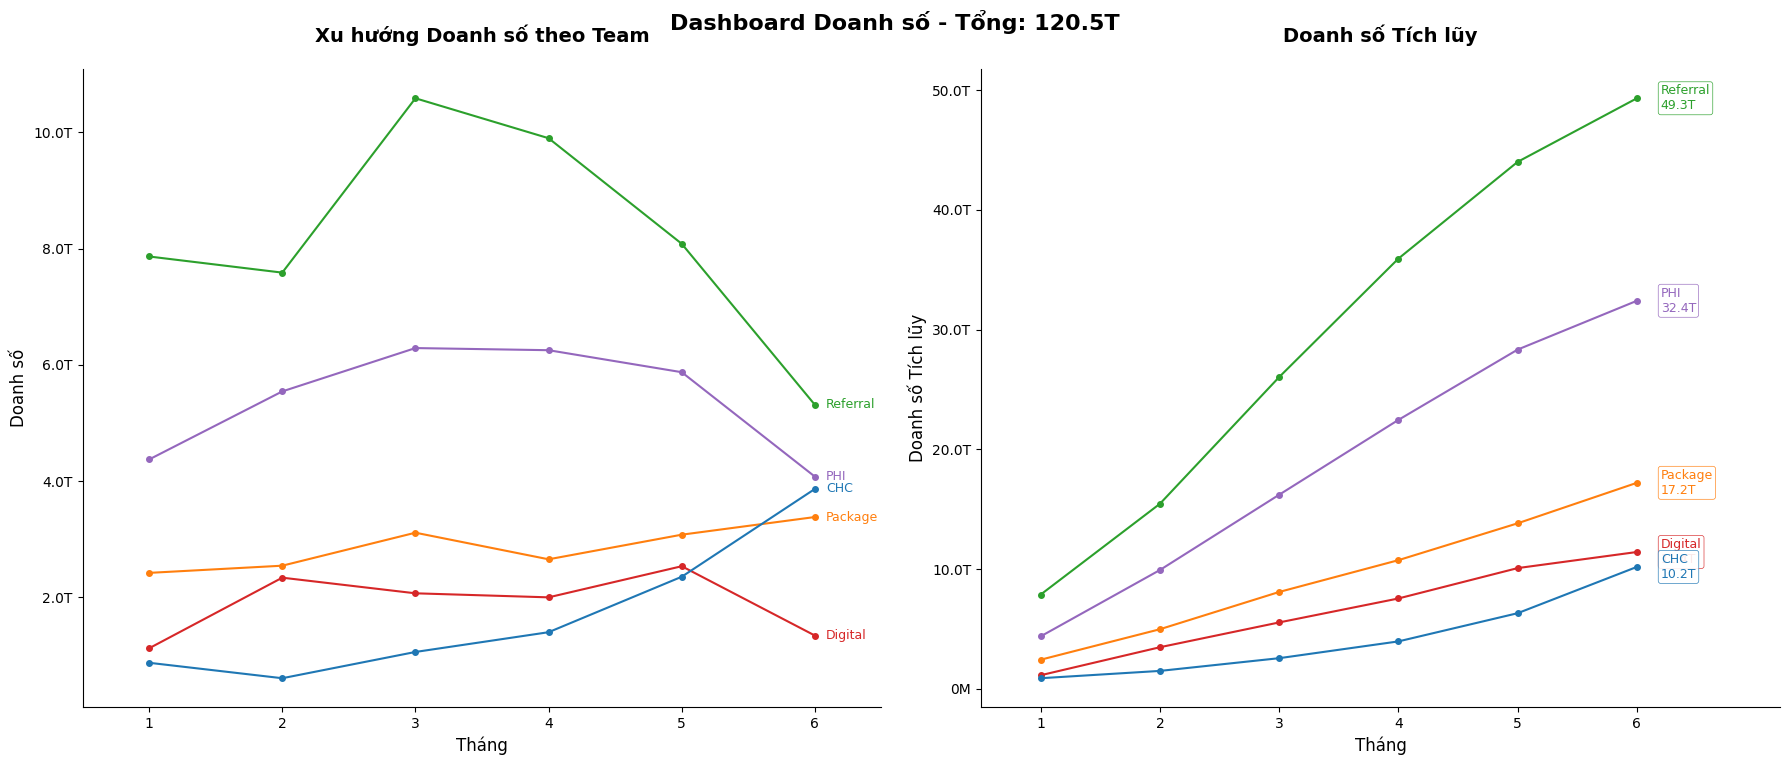

💾 Đã lưu biểu đồ cải tiến tại: /content/drive/MyDrive/charts/01_xu_huong_team_cai_tien.png

📊 THÔNG TIN TỰ ĐỘNG:
- Tháng có dữ liệu: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
- Tháng cuối: 6
- Các team: ['Referral', 'PHI', 'Package', 'Digital', 'CHC']
- Tổng doanh số: 120.5T


In [56]:
# --- [6. Biểu đồ 1: Xu hướng doanh số theo Team - Cải tiến theo yêu cầu] ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Lọc dữ liệu có giá trị thực hiện tạm tính
df_plot = df[df['thuc hien tam tinh'].notna()].copy()

# Xác định tháng có dữ liệu để tự động điều chỉnh
months_available = sorted(df_plot['thang'].unique())
max_month = max(months_available)

# Tính tổng doanh số của từng team để xác định thứ tự
total_sales = df_plot.groupby('team')['thuc hien tam tinh'].sum().sort_values(ascending=False)

# Hàm format số liệu thông minh
def format_value(value):
    if value >= 1000:
        return f'{value/1000:.1f}T'  # Tỷ
    else:
        return f'{value:.0f}M'  # Triệu

# Màu sắc riêng biệt cho từng team
team_colors = {
    'CHC': '#1f77b4',      # Xanh dương
    'Package': '#ff7f0e',   # Cam
    'Referral': '#2ca02c',  # Xanh lá
    'Digital': '#d62728',   # Đỏ
    'PHI': '#9467bd',       # Tím
}

# Lấy màu tự động nếu team không có trong dict
unique_teams = df_plot['team'].unique()
colors_auto = plt.cm.Set1(np.linspace(0, 1, len(unique_teams)))
for i, team in enumerate(unique_teams):
    if team not in team_colors:
        team_colors[team] = colors_auto[i]

# === BIỂU ĐỒ 1: TỔNG QUAN THEO TEAM ===
for team in total_sales.index:
    data_team = df_plot[df_plot['team'] == team].groupby('thang')['thuc hien tam tinh'].sum()
    color = team_colors.get(team, '#666666')

    line = ax1.plot(data_team.index, data_team.values/1000000,
                   marker='o', linewidth=1.5, color=color,  # Mỏng hơn
                   markersize=4, label=team)

    # Thêm nhãn bên cạnh điểm cuối
    if len(data_team) > 0:
        last_point = data_team.iloc[-1]
        last_month = data_team.index[-1]
        ax1.annotate(f'{team}',
                    xy=(last_month, last_point/1000000),
                    xytext=(8, 0), textcoords='offset points',
                    fontsize=9, color=color, fontweight='normal',
                    ha='left', va='center')

ax1.set_title('Xu hướng Doanh số theo Team', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Tháng', fontsize=12)
ax1.set_ylabel('Doanh số', fontsize=12)
ax1.set_xticks(months_available)  # Chỉ hiện tháng có dữ liệu
ax1.set_xlim(0.5, max_month + 0.5)  # Tự động điều chỉnh theo tháng có dữ liệu
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Format trục y với đơn vị thông minh
def smart_formatter(x, p):
    if x >= 1000:
        return f'{x/1000:.1f}T'
    else:
        return f'{x:.0f}M'

ax1.yaxis.set_major_formatter(plt.FuncFormatter(smart_formatter))

# === BIỂU ĐỒ 2: SO SÁNH TÍCH LŨY ===
cumulative_data = {}
for team in total_sales.index:
    data_team = df_plot[df_plot['team'] == team].groupby('thang')['thuc hien tam tinh'].sum()
    cumulative_data[team] = data_team.cumsum()

# Lưu thông tin để tránh chồng lấn label
label_positions = []

for team in total_sales.index:
    if team in cumulative_data:
        data = cumulative_data[team]
        color = team_colors.get(team, '#666666')

        ax2.plot(data.index, data.values/1000000,
                marker='o', linewidth=1.5, color=color,  # Mỏng hơn
                markersize=4)

        # Annotation cho điểm cuối với tránh chồng lấn
        if len(data) > 0:
            last_value = data.iloc[-1]/1000000
            last_month = data.index[-1]

            # Tìm vị trí y phù hợp để tránh chồng lấn
            adjusted_y = last_value
            min_distance = 2  # Khoảng cách tối thiểu (đơn vị: T)

            for existing_pos in label_positions:
                if abs(adjusted_y - existing_pos) < min_distance:
                    if adjusted_y >= existing_pos:
                        adjusted_y = existing_pos + min_distance
                    else:
                        adjusted_y = existing_pos - min_distance

            label_positions.append(adjusted_y)

            # Vẽ đường nối nếu cần thiết
            if abs(adjusted_y - last_value) > 0.5:
                ax2.plot([last_month, last_month + 0.2],
                        [last_value, adjusted_y],
                        color=color, linestyle=':', alpha=0.7, linewidth=1)

            ax2.annotate(f'{team}\n{format_value(adjusted_y)}',
                        xy=(last_month + 0.2, adjusted_y),
                        fontsize=9, color=color, fontweight='normal',
                        bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                                 alpha=0.9, edgecolor=color, linewidth=0.5),
                        ha='left', va='center')

ax2.set_title('Doanh số Tích lũy', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Tháng', fontsize=12)
ax2.set_ylabel('Doanh số Tích lũy', fontsize=12)
ax2.set_xticks(months_available)  # Chỉ hiện tháng có dữ liệu
ax2.set_xlim(0.5, max_month + 1.2)  # Mở rộng để chứa label
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(smart_formatter))

# Tổng doanh số team
total_team_sales = df_plot['thuc hien tam tinh'].sum() / 1000000
fig.suptitle(f'Dashboard Doanh số - Tổng: {format_value(total_team_sales)}',
             fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout()

# Lưu ảnh
img_path = os.path.join(IMG_DIR, '01_xu_huong_team_cai_tien.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(f"💾 Đã lưu biểu đồ cải tiến tại: {img_path}")

# In thông tin tự động điều chỉnh
print(f"\n📊 THÔNG TIN TỰ ĐỘNG:")
print(f"- Tháng có dữ liệu: {months_available}")
print(f"- Tháng cuối: {max_month}")
print(f"- Các team: {list(total_sales.index)}")
print(f"- Tổng doanh số: {format_value(total_team_sales)}")

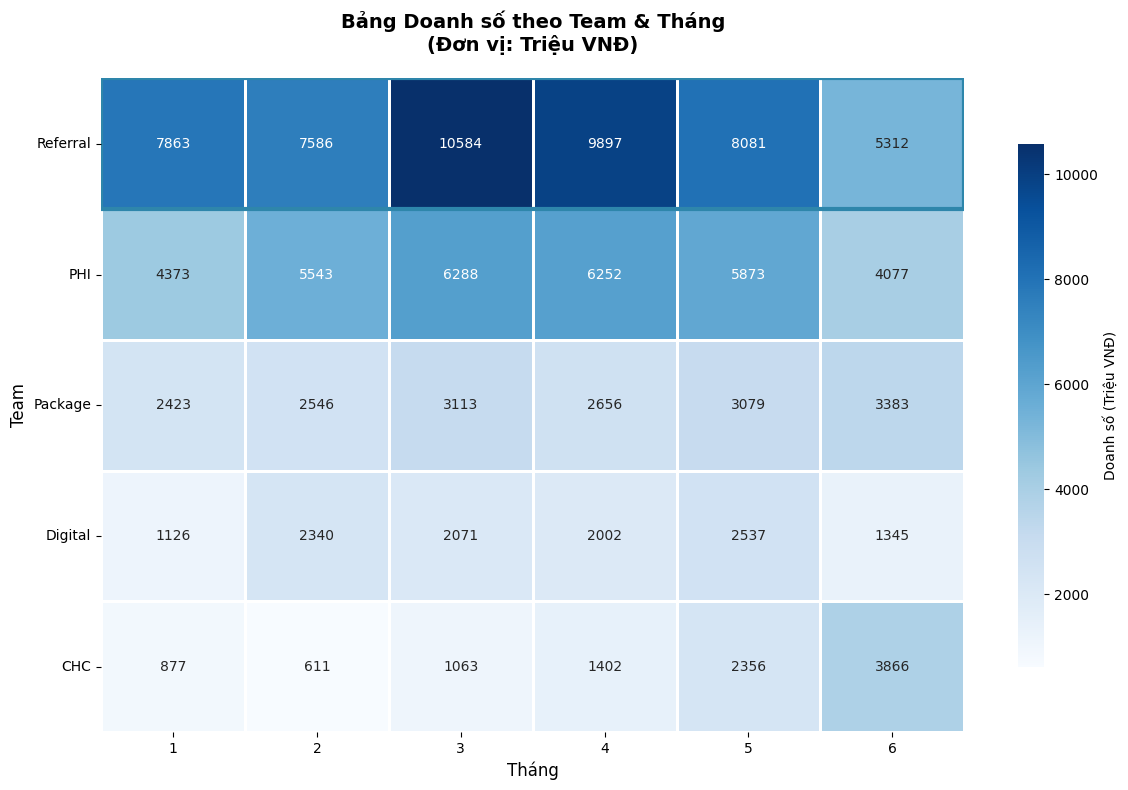

💾 Đã lưu bảng ranking tại: /content/drive/MyDrive/charts/01B_ranking_team_toi_gian.png


In [57]:
# --- [6B. Biểu đồ ranking Team - Phong cách tối giản] ---

plt.figure(figsize=(12, 8))

# Tạo dữ liệu ranking
df_ranking = df_plot.groupby(['team', 'thang'])['thuc hien tam tinh'].sum().reset_index()
pivot_data = df_ranking.pivot(index='team', columns='thang', values='thuc hien tam tinh')
pivot_data = pivot_data.fillna(0) / 1000000  # Chuyển sang triệu

# Sắp xếp theo tổng doanh số
pivot_data['total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values('total', ascending=False).drop('total', axis=1)

# Tạo heatmap tối giản
sns.heatmap(pivot_data,
            annot=True,
            fmt='.0f',
            cmap='Blues',  # Màu đơn giản
            cbar_kws={'label': 'Doanh số (Triệu VNĐ)', 'shrink': 0.8},
            linewidths=1,
            linecolor='white')

plt.title('Bảng Doanh số theo Team & Tháng\n(Đơn vị: Triệu VNĐ)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Làm nổi bật top performer
if len(pivot_data) > 0:
    top_team_idx = 0  # Team đầu tiên sau khi sort
    plt.gca().add_patch(plt.Rectangle((0, top_team_idx), len(pivot_data.columns), 1,
                                    fill=False, edgecolor='#2E86AB', lw=3))

plt.tight_layout()

# Lưu ảnh
img_path = os.path.join(IMG_DIR, '01B_ranking_team_toi_gian.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(f"💾 Đã lưu bảng ranking tại: {img_path}")

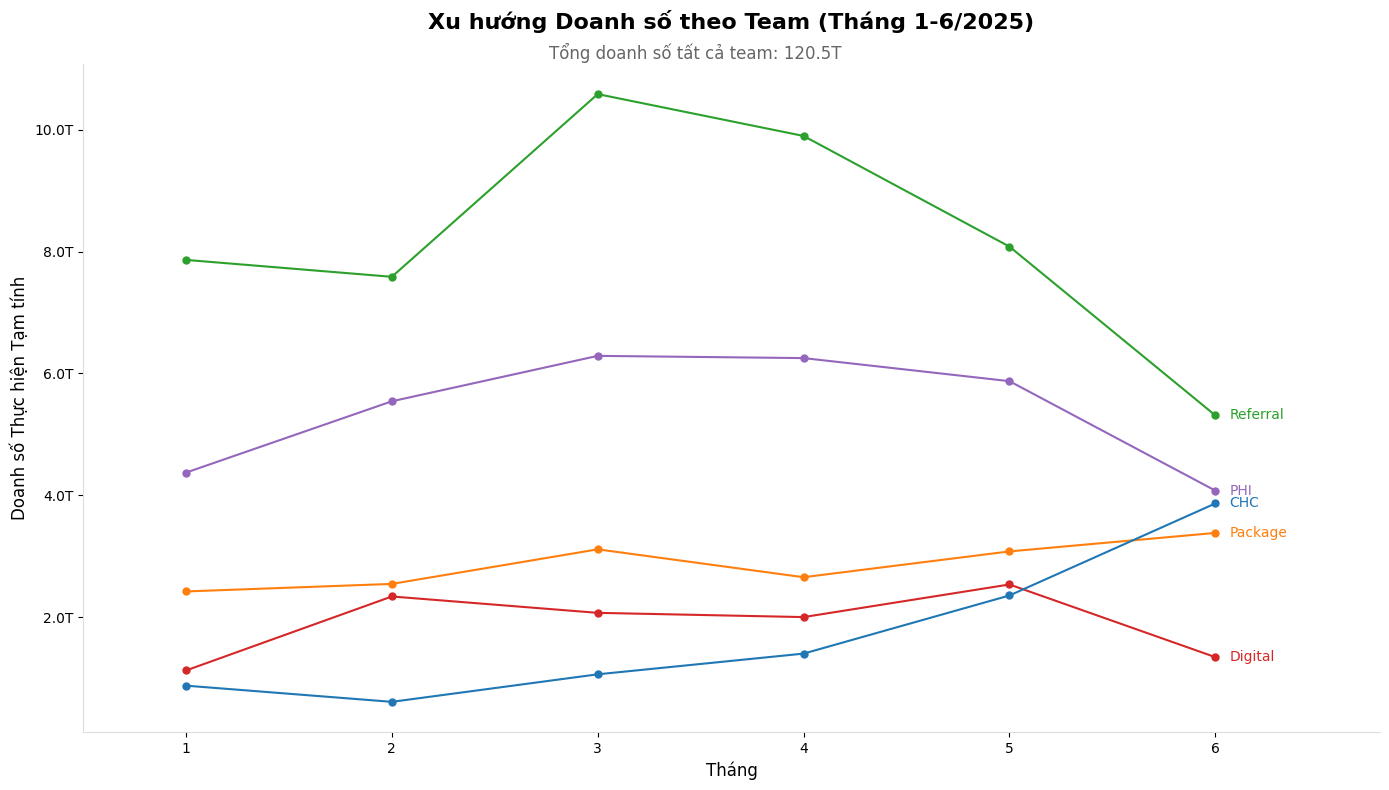

💾 Đã lưu biểu đồ đơn giản tại: /content/drive/MyDrive/charts/01C_xu_huong_team_don_gian.png

✅ Tự động điều chỉnh theo dữ liệu:
📅 Hiện tại: Tháng 1-6
🔄 Mở rộng: Chỉ cần thêm dữ liệu tháng 7,8,9... vào sheet


In [58]:
# --- [6B. Biểu đồ đơn giản - Chỉ tập trung vào xu hướng] ---

plt.figure(figsize=(14, 8))

# Lọc dữ liệu và tính toán
df_plot = df[df['thuc hien tam tinh'].notna()].copy()
months_available = sorted(df_plot['thang'].unique())
max_month = max(months_available)
total_sales = df_plot.groupby('team')['thuc hien tam tinh'].sum().sort_values(ascending=False)

# Vẽ biểu đồ cho từng team
for team in total_sales.index:
    data_team = df_plot[df_plot['team'] == team].groupby('thang')['thuc hien tam tinh'].sum()
    color = team_colors.get(team, '#666666')

    plt.plot(data_team.index, data_team.values/1000000,
             marker='o', linewidth=1.5, color=color,
             markersize=5, label=team)

    # Nhãn bên cạnh điểm cuối
    if len(data_team) > 0:
        last_point = data_team.iloc[-1]
        last_month = data_team.index[-1]
        plt.annotate(f'{team}',
                    xy=(last_month, last_point/1000000),
                    xytext=(10, 0), textcoords='offset points',
                    fontsize=10, color=color, fontweight='normal',
                    ha='left', va='center')

# Styling
plt.title('Xu hướng Doanh số theo Team (Tháng 1-6/2025)',
          fontsize=16, fontweight='bold', pad=25)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh số Thực hiện Tạm tính', fontsize=12)
plt.xticks(months_available)
plt.xlim(0.5, max_month + 0.8)

# Loại bỏ các đường viền không cần thiết
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Format trục y
ax.yaxis.set_major_formatter(plt.FuncFormatter(smart_formatter))

# Thêm subtitle
total_sales_formatted = format_value(df_plot['thuc hien tam tinh'].sum()/1000000)
plt.figtext(0.5, 0.92, f'Tổng doanh số tất cả team: {total_sales_formatted}',
           ha='center', fontsize=12, color='#666666')

plt.tight_layout()

# Lưu ảnh
img_path = os.path.join(IMG_DIR, '01C_xu_huong_team_don_gian.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(f"💾 Đã lưu biểu đồ đơn giản tại: {img_path}")

print(f"\n✅ Tự động điều chỉnh theo dữ liệu:")
print(f"📅 Hiện tại: Tháng 1-{max_month}")
print(f"🔄 Mở rộng: Chỉ cần thêm dữ liệu tháng 7,8,9... vào sheet")

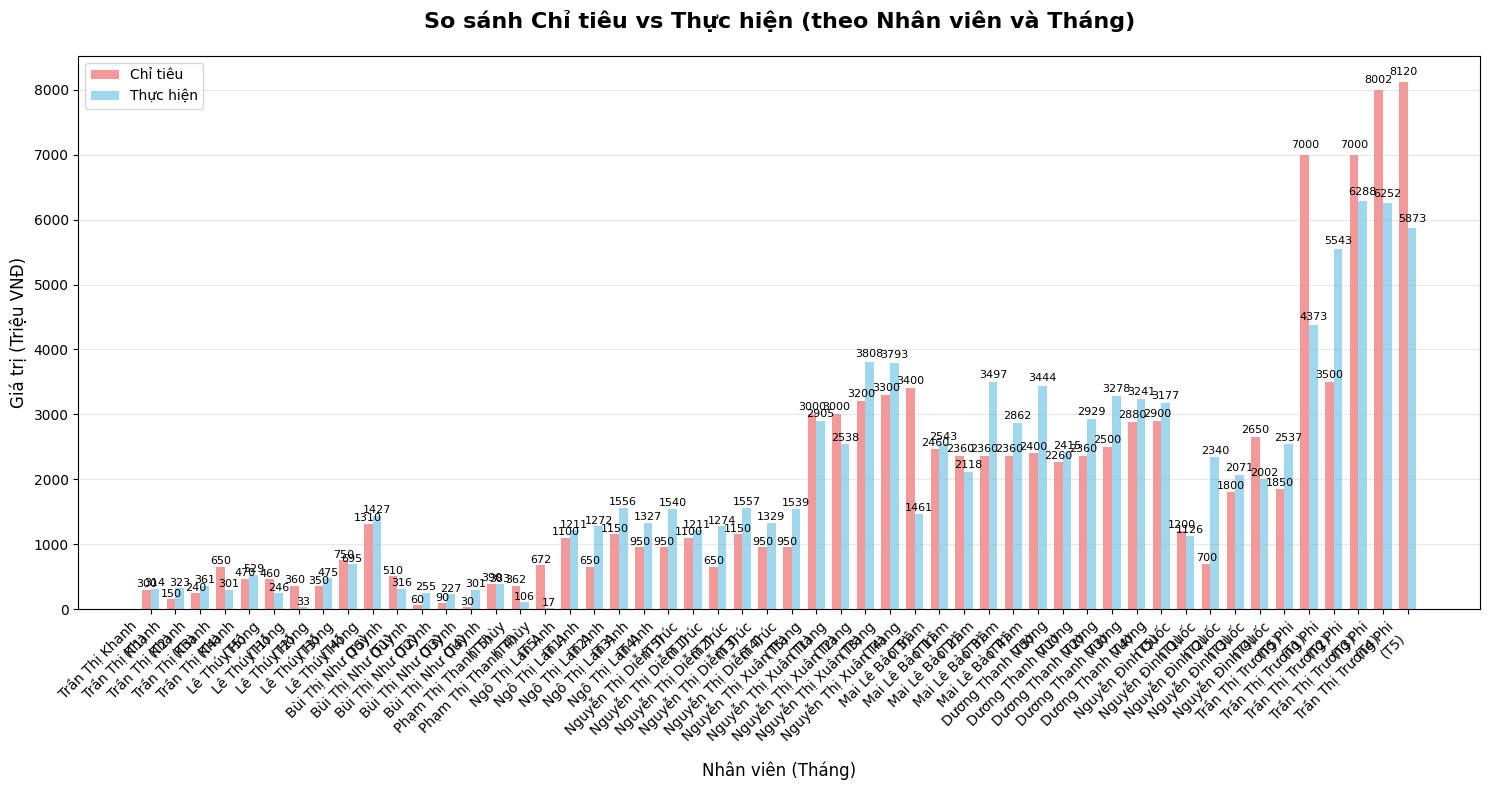

💾 Đã lưu biểu đồ tại: /content/drive/MyDrive/charts/02_so_sanh_chi_tieu_thuc_hien.png


In [59]:
# --- [7. Biểu đồ 2: So sánh Chỉ tiêu vs Thực hiện (Bar Chart)] ---

plt.figure(figsize=(15, 8))

# Lọc dữ liệu có đầy đủ chỉ tiêu và thực hiện
df_plot = df[(df['chi tieu'].notna()) & (df['thuc hien'].notna())].copy()

# Tạo dữ liệu cho biểu đồ
x_labels = []
chi_tieu_values = []
thuc_hien_values = []

for _, row in df_plot.iterrows():
    label = f"{row['ten nhan vien']}\n(T{int(row['thang'])})"
    x_labels.append(label)
    chi_tieu_values.append(row['chi tieu']/1000000)
    thuc_hien_values.append(row['thuc hien']/1000000)

x_pos = np.arange(len(x_labels))
width = 0.35

# Tạo cột
bars1 = plt.bar(x_pos - width/2, chi_tieu_values, width,
                label='Chỉ tiêu', color='lightcoral', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, thuc_hien_values, width,
                label='Thực hiện', color='skyblue', alpha=0.8)

plt.title('So sánh Chỉ tiêu vs Thực hiện (theo Nhân viên và Tháng)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Nhân viên (Tháng)', fontsize=12)
plt.ylabel('Giá trị (Triệu VNĐ)', fontsize=12)
plt.xticks(x_pos, x_labels, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Thêm giá trị lên đầu cột
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.0f}', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Lưu ảnh
img_path = os.path.join(IMG_DIR, '02_so_sanh_chi_tieu_thuc_hien.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"💾 Đã lưu biểu đồ tại: {img_path}")

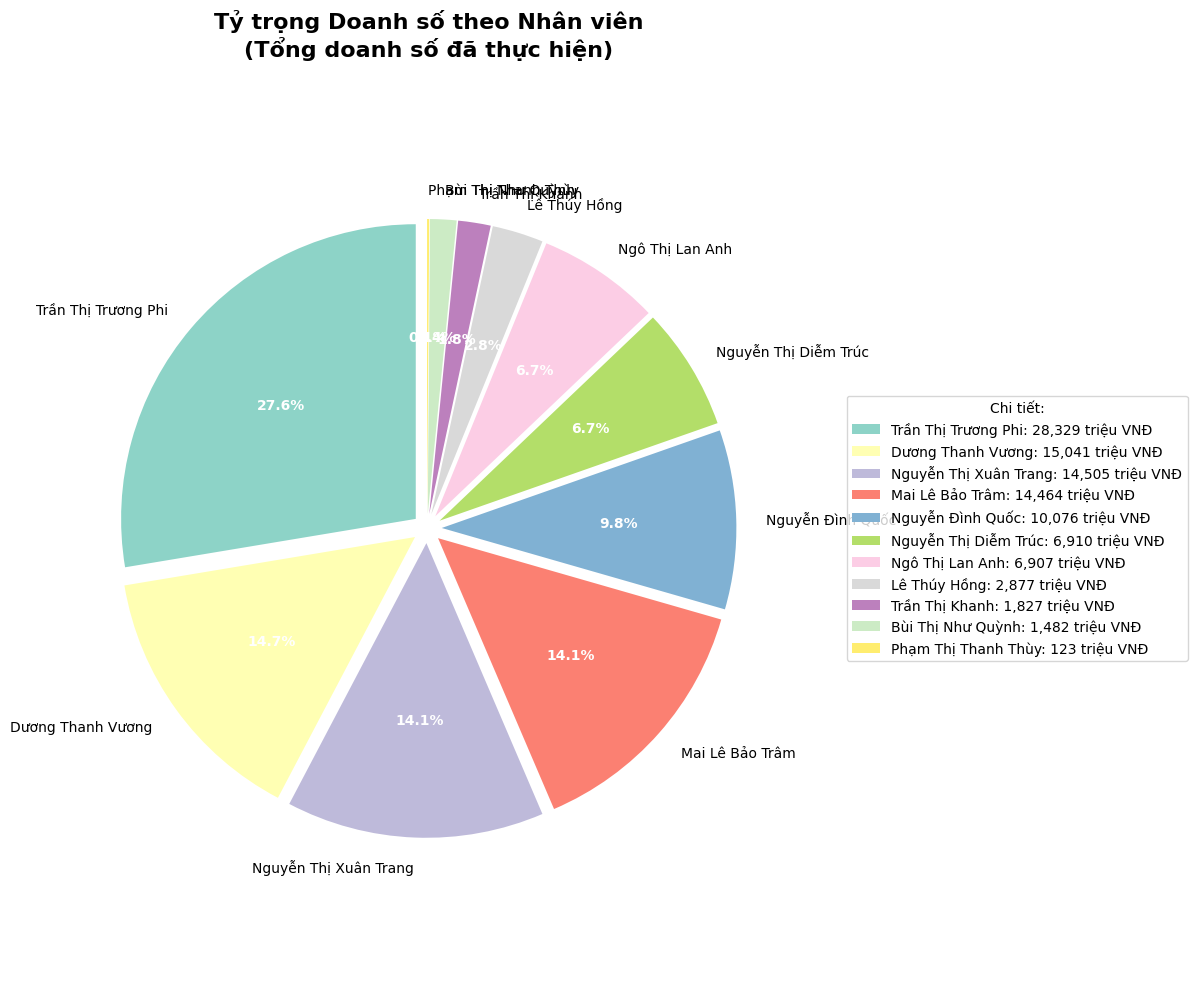

💾 Đã lưu biểu đồ tại: /content/drive/MyDrive/charts/03_ty_trong_doanh_so_nhan_vien.png


In [60]:
# --- [8. Biểu đồ 3: Tỷ trọng doanh thu theo nhân viên (Pie Chart)] ---

plt.figure(figsize=(12, 10))

# Tính tổng doanh số của từng nhân viên
df_plot = df[df['thuc hien'].notna()].copy()
doanh_so_nv = df_plot.groupby('ten nhan vien')['thuc hien'].sum().sort_values(ascending=False)

# Tạo màu sắc
colors = plt.cm.Set3(np.linspace(0, 1, len(doanh_so_nv)))

# Tạo biểu đồ tròn
wedges, texts, autotexts = plt.pie(doanh_so_nv.values,
                                   labels=doanh_so_nv.index,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=colors,
                                   explode=[0.05] * len(doanh_so_nv))

plt.title('Tỷ trọng Doanh số theo Nhân viên\n(Tổng doanh số đã thực hiện)',
          fontsize=16, fontweight='bold', pad=20)

# Cải thiện hiển thị text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Thêm legend với giá trị cụ thể
legend_labels = [f'{name}: {value/1000000:,.0f} triệu VNĐ'
                for name, value in doanh_so_nv.items()]
plt.legend(wedges, legend_labels, title="Chi tiết:",
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()

# Lưu ảnh
img_path = os.path.join(IMG_DIR, '03_ty_trong_doanh_so_nhan_vien.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"💾 Đã lưu biểu đồ tại: {img_path}")

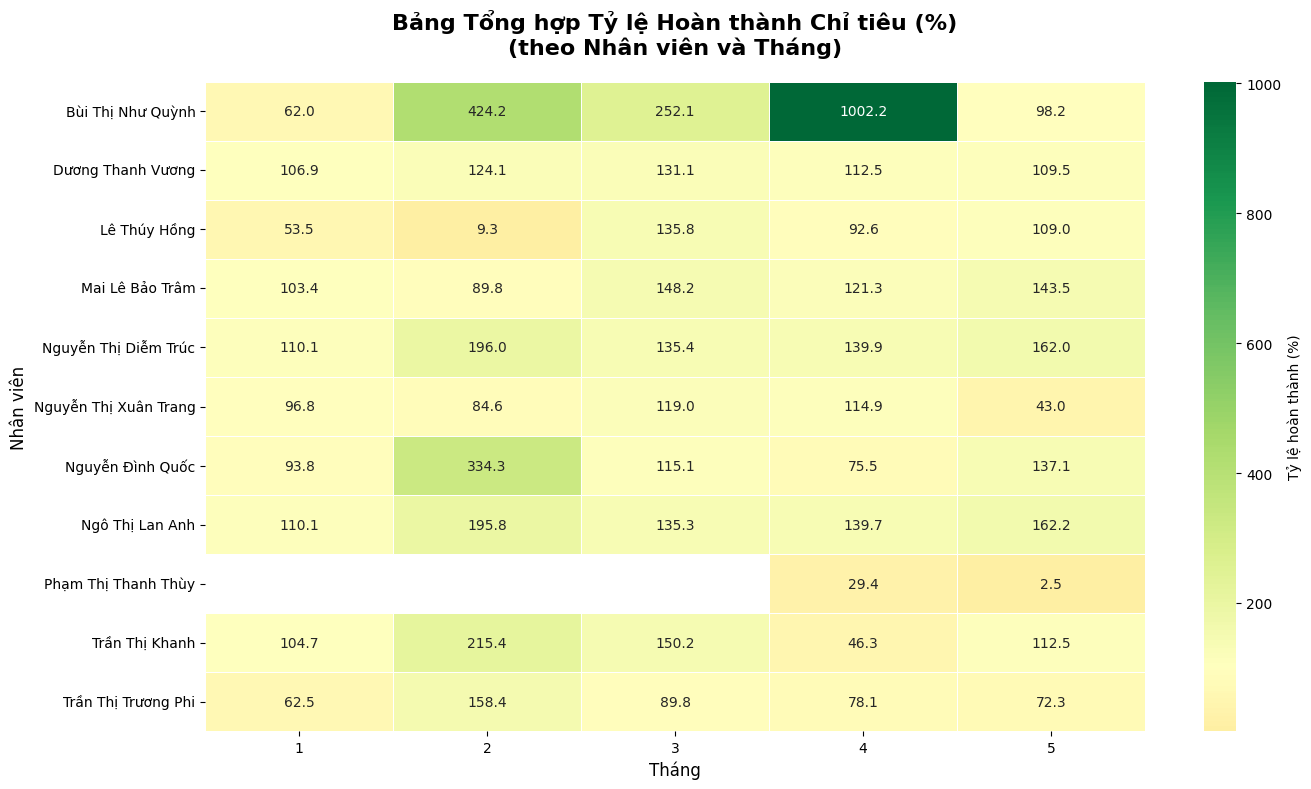

💾 Đã lưu biểu đồ tại: /content/drive/MyDrive/charts/04_bang_tong_hop_hieu_suat.png


In [61]:
# --- [9. Biểu đồ 4: Bảng tổng hợp hiệu suất (Heatmap)] ---

plt.figure(figsize=(14, 8))

# Tạo pivot table cho tỷ lệ hoàn thành
df_plot = df[df['ty_le_hoan_thanh'].notna()].copy()
pivot_data = df_plot.pivot_table(values='ty_le_hoan_thanh',
                                 index='ten nhan vien',
                                 columns='thang',
                                 aggfunc='mean')

# Tạo heatmap
sns.heatmap(pivot_data,
            annot=True,
            fmt='.1f',
            cmap='RdYlGn',
            center=100,
            cbar_kws={'label': 'Tỷ lệ hoàn thành (%)'},
            linewidths=0.5)

plt.title('Bảng Tổng hợp Tỷ lệ Hoàn thành Chỉ tiêu (%)\n(theo Nhân viên và Tháng)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Nhân viên', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()

# Lưu ảnh
img_path = os.path.join(IMG_DIR, '04_bang_tong_hop_hieu_suat.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"💾 Đã lưu biểu đồ tại: {img_path}")

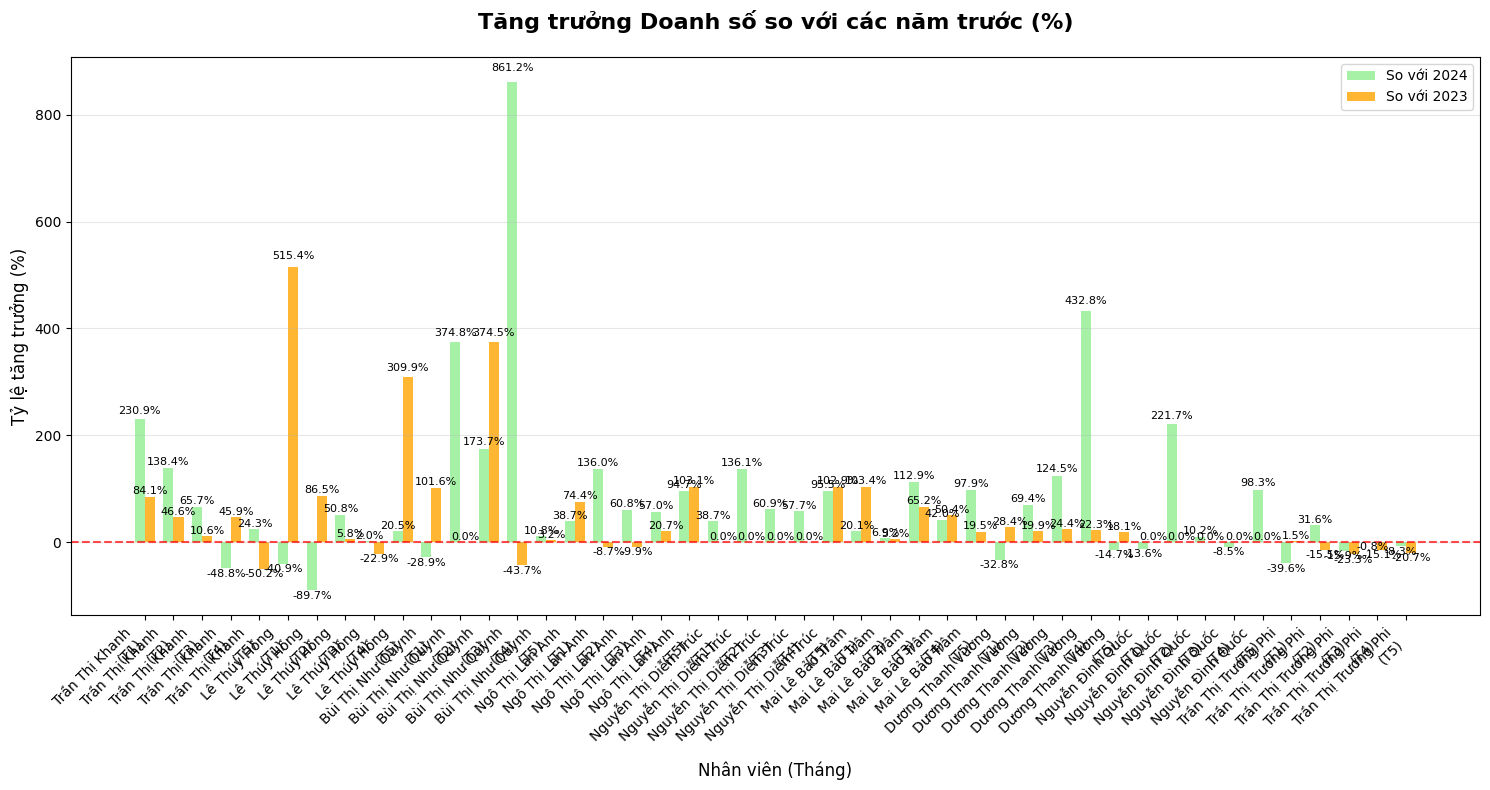

💾 Đã lưu biểu đồ tại: /content/drive/MyDrive/charts/05_tang_truong_qua_nam.png


In [62]:
# --- [10. Biểu đồ 5: So sánh tăng trưởng qua các năm] ---

plt.figure(figsize=(15, 8))

# Lọc dữ liệu có đầy đủ thông tin tăng trưởng
df_plot = df[(df['tang_truong_2024'].notna()) | (df['tang_truong_2023'].notna())].copy()

# Tạo dữ liệu cho biểu đồ
x_labels = []
tang_truong_2024 = []
tang_truong_2023 = []

for _, row in df_plot.iterrows():
    if not pd.isna(row['tang_truong_2024']) or not pd.isna(row['tang_truong_2023']):
        label = f"{row['ten nhan vien']}\n(T{int(row['thang'])})"
        x_labels.append(label)
        tang_truong_2024.append(row['tang_truong_2024'] if not pd.isna(row['tang_truong_2024']) else 0)
        tang_truong_2023.append(row['tang_truong_2023'] if not pd.isna(row['tang_truong_2023']) else 0)

x_pos = np.arange(len(x_labels))
width = 0.35

# Tạo cột
bars1 = plt.bar(x_pos - width/2, tang_truong_2024, width,
                label='So với 2024', color='lightgreen', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, tang_truong_2023, width,
                label='So với 2023', color='orange', alpha=0.8)

plt.title('Tăng trưởng Doanh số so với các năm trước (%)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Nhân viên (Tháng)', fontsize=12)
plt.ylabel('Tỷ lệ tăng trưởng (%)', fontsize=12)
plt.xticks(x_pos, x_labels, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Thêm giá trị lên đầu cột
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (abs(height)*0.02 if height >= 0 else -abs(height)*0.02),
             f'{height:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (abs(height)*0.02 if height >= 0 else -abs(height)*0.02),
             f'{height:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

plt.tight_layout()

# Lưu ảnh
img_path = os.path.join(IMG_DIR, '05_tang_truong_qua_nam.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"💾 Đã lưu biểu đồ tại: {img_path}")

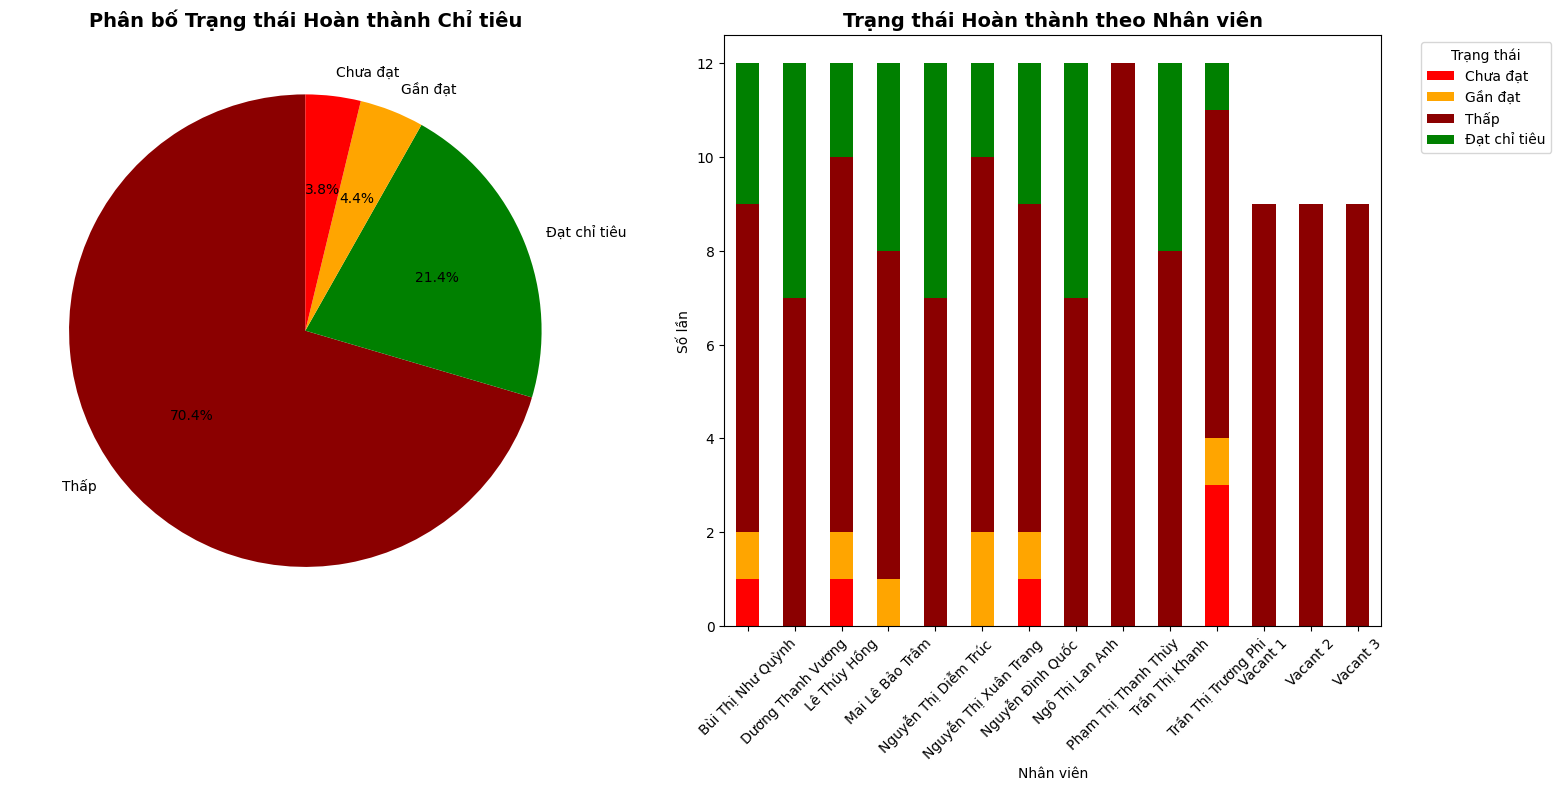

💾 Đã lưu biểu đồ tại: /content/drive/MyDrive/charts/06_phan_tich_trang_thai.png


In [63]:
# --- [11. Biểu đồ 6: Phân tích trạng thái hoàn thành] ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Biểu đồ 1: Phân bố trạng thái
df_plot = df[df['trang_thai'].notna()].copy()
status_counts = df_plot['trang_thai'].value_counts()

colors_status = {'Đạt chỉ tiêu': 'green', 'Gần đạt': 'orange',
                'Chưa đạt': 'red', 'Thấp': 'darkred'}
colors = [colors_status.get(status, 'gray') for status in status_counts.index]

wedges1, texts1, autotexts1 = ax1.pie(status_counts.values,
                                       labels=status_counts.index,
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       colors=colors)

ax1.set_title('Phân bố Trạng thái Hoàn thành Chỉ tiêu', fontsize=14, fontweight='bold')

# Biểu đồ 2: Trạng thái theo nhân viên
status_by_employee = df_plot.groupby(['ten nhan vien', 'trang_thai']).size().unstack(fill_value=0)

status_by_employee.plot(kind='bar', stacked=True, ax=ax2,
                       color=[colors_status.get(col, 'gray') for col in status_by_employee.columns])

ax2.set_title('Trạng thái Hoàn thành theo Nhân viên', fontsize=14, fontweight='bold')
ax2.set_xlabel('Nhân viên')
ax2.set_ylabel('Số lần')
ax2.legend(title='Trạng thái', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Lưu ảnh
img_path = os.path.join(IMG_DIR, '06_phan_tich_trang_thai.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"💾 Đã lưu biểu đồ tại: {img_path}")

In [66]:
# --- [12. Tổng kết và báo cáo] ---

print("📊 === TỔNG KẾT PHÂN TÍCH DỮ LIỆU ===")
print(f"📂 Thư mục lưu ảnh: {IMG_DIR}")

# Thống kê tổng quan
df_analysis = df[df['thuc hien'].notna()].copy()

print(f"\n📈 THỐNG KÊ TỔNG QUAN:")
print(f"- Tổng số record phân tích: {len(df_analysis)}")
print(f"- Số nhân viên: {df_analysis['ten nhan vien'].nunique()}")
print(f"- Số tháng có dữ liệu: {df_analysis['thang'].nunique()}")
print(f"- Tổng doanh số thực hiện: {df_analysis['thuc hien'].sum()/1000000:,.0f} triệu VNĐ")
print(f"- Tổng chỉ tiêu: {df_analysis['chi tieu'].sum()/1000000:,.0f} triệu VNĐ")
print(f"- Tỷ lệ hoàn thành trung bình: {df_analysis['ty_le_hoan_thanh'].mean():.1f}%")

print(f"\n🏆 TOP PERFORMER:")
top_performer = df_analysis.groupby('ten nhan vien')['thuc hien'].sum().sort_values(ascending=False)
for i, (name, value) in enumerate(top_performer.head(3).items(), 1):
    print(f"{i}. {name}: {value/1000000:,.0f} triệu VNĐ")

print(f"\n📋 DANH SÁCH FILE ẢNH ĐÃ TẠO:")
for i, filename in enumerate([
    '01_xu_huong_doanh_so_thang.png',
    '02_so_sanh_chi_tieu_thuc_hien.png',
    '03_ty_trong_doanh_so_nhan_vien.png',
    '04_bang_tong_hop_hieu_suat.png',
    '05_tang_truong_qua_nam.png',
    '06_phan_tich_trang_thai.png'
], 1):
    full_path = os.path.join(IMG_DIR, filename)
    if os.path.exists(full_path):
        print(f"{i}. ✅ {filename}")
    else:
        print(f"{i}. ❌ {filename} (không tìm thấy)")

print(f"\n✅ Hoàn tất phân tích và tạo dashboard!")
print(f"📁 Tất cả file ảnh đã được lưu tại: {IMG_DIR}")

📊 === TỔNG KẾT PHÂN TÍCH DỮ LIỆU ===
📂 Thư mục lưu ảnh: /content/drive/MyDrive/charts

📈 THỐNG KÊ TỔNG QUAN:
- Tổng số record phân tích: 52
- Số nhân viên: 11
- Số tháng có dữ liệu: 5
- Tổng doanh số thực hiện: 102,541 triệu VNĐ
- Tổng chỉ tiêu: 99,317 triệu VNĐ
- Tỷ lệ hoàn thành trung bình: 139.5%

🏆 TOP PERFORMER:
1. Trần Thị Trương Phi: 28,329 triệu VNĐ
2. Dương Thanh Vương: 15,041 triệu VNĐ
3. Nguyễn Thị Xuân Trang: 14,505 triệu VNĐ

📋 DANH SÁCH FILE ẢNH ĐÃ TẠO:
1. ❌ 01_xu_huong_doanh_so_thang.png (không tìm thấy)
2. ✅ 02_so_sanh_chi_tieu_thuc_hien.png
3. ✅ 03_ty_trong_doanh_so_nhan_vien.png
4. ✅ 04_bang_tong_hop_hieu_suat.png
5. ✅ 05_tang_truong_qua_nam.png
6. ✅ 06_phan_tich_trang_thai.png

✅ Hoàn tất phân tích và tạo dashboard!
📁 Tất cả file ảnh đã được lưu tại: /content/drive/MyDrive/charts
